# Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Diesel

## Importação e verificação dos dados

In [2]:
base = pd.read_excel("/content/drive/MyDrive/dados_desafiodatascientistintern_vendas_distribuidoras_anp.xlsx", sheet_name="diesel")
base

regiao  meses         2000         2001         2002         2003  \
0       df      1    23310.896    29319.999    30934.830    29295.326   
1       df      2    25967.743    27720.714    27585.412    28328.216   
2       df      3    24590.674    32149.816    32724.180    28047.691   
3       df      4    24975.963    32156.821    33863.218    31787.357   
4       df      5    27224.597    34122.639    34484.371    32476.371   
..     ...    ...          ...          ...          ...          ...   
103     br      8  3182949.584  3456504.423  3302889.499  3234107.777   
104     br      9  3010822.732  3208521.082  3265195.464  3350136.350   
105     br     10  3150899.551  3455040.138  3683701.381  3563090.189   
106     br     11  3086396.797  3261714.970  3124956.731  3105640.803   
107     br     12  2816038.586  2828623.186  2947422.934  3090922.565   

            2004         2005         2006          2007  ...          2011  \
0      24360.754    27745.916    28110.059  2.641444e+04  ...  2.777516e+04   
1      23477.298    27132.401    26344.263  2.557362e+04  ...  2.960359e+04   
2      30092.094    31146.971    31039.292  3.187514e+04  ...  3.299791e+04   
3      29433.731    31062.637    28794.417  3.028679e+04  ...  3.337487e+04   
4      30442.965    31339.791    32818.387  3.227427e+04  ...  3.426898e+04   
..           ...          ...          ...           ...  ...           ...   
103  3600940.306  3641539.800  3547416.155  3.834209e+06  ...  4.863319e+06   
104  3556587.850  3453425.638  3460791.247  3.523812e+06  ...  4.794123e+06   
105  3488649.186  3357950.662  3546454.615  3.907983e+06  ...  4.652908e+06   
106  3391548.937  3360962.967  3400081.976  3.663390e+06  ...  4.542682e+06   
107  3276581.051  3177252.901  3143626.927  3.365409e+06  ...  4.287177e+06   

             2012         2013         2014          2015         2016  \
0    2.782812e+04    31349.982    33989.250  3.543027e+04    28797.050   
1    3.154008e+04    30453.300    34968.900  3.195720e+04    31339.200   
2    3.620252e+04    34267.700    35642.943  3.727857e+04    34351.200   
3    3.360222e+04    36087.800    36848.905  3.647600e+04    32500.850   
4    3.636425e+04    36738.123    39003.000  3.679303e+04    32512.108   
..            ...          ...          ...           ...          ...   
103  5.218641e+06  5369365.130  5350986.962  5.017610e+06  4903384.937   
104  4.734886e+06  5029822.695  5355678.468  4.932081e+06  4775598.223   
105  5.259785e+06  5483350.454  5732736.717  5.181460e+06  4631472.072   
106  5.000417e+06  5091614.642  4910217.661  4.558032e+06  4400045.949   
107  4.503146e+06  4469189.373  4709598.756  4.501075e+06  4203042.669   

             2017         2018         2019         2020  
0    2.782853e+04    26758.416    27481.500    28437.000  
1    2.731378e+04    25848.095    29089.500    30150.000  
2    3.351666e+04    32373.071    29682.500    29206.000  
3    2.836169e+04    30314.696    30781.429    22863.382  
4    3.143394e+04    29546.745    31945.500    25737.500  
..            ...          ...          ...          ...  
103  5.001582e+06  5197649.583  5284080.566  5164422.187  
104  4.856584e+06  4759700.970  4891110.988  5237175.795  
105  4.915778e+06  5058821.472  5415773.434  5537466.497  
106  4.640682e+06  4738254.634  4808784.153  4900948.094  
107  4.251226e+06  4408063.522  4286608.506  4681920.117  

[108 rows x 23 columns]

In [3]:
base.dtypes

regiao     object
meses       int64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object

In [4]:
base.isnull().sum()

regiao    0
meses     0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
dtype: int64

In [5]:
base.describe()

meses          2000          2001          2002          2003  \
count  108.000000  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean     6.500000  4.938625e+05  5.198448e+05  5.301442e+05  5.189756e+05   
std      3.468146  8.920410e+05  9.433099e+05  9.578229e+05  9.367594e+05   
min      1.000000  2.331090e+04  2.452292e+04  2.580355e+04  2.587295e+04   
25%      3.750000  4.740605e+04  5.264457e+04  5.422024e+04  4.662447e+04   
50%      6.500000  1.071322e+05  1.111028e+05  1.141439e+05  1.153861e+05   
75%      9.250000  3.833788e+05  3.822098e+05  3.862856e+05  3.900387e+05   
max     12.000000  3.182950e+06  3.456504e+06  3.683701e+06  3.563090e+06   

               2004          2005          2006          2007          2008  \
count  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean   5.538121e+05  5.530904e+05  5.512135e+05  5.891927e+05  6.334905e+05   
std    9.957125e+05  9.932015e+05  9.893268e+05  1.054133e+06  1.133724e+06   
min    2.347730e+04  2.588933e+04  2.634426e+04  2.557362e+04  2.766658e+04   
25%    5.094378e+04  5.535949e+04  5.706546e+04  6.291995e+04  7.200042e+04   
50%    1.266500e+05  1.242688e+05  1.260393e+05  1.338525e+05  1.453206e+05   
75%    4.456351e+05  4.459972e+05  4.638431e+05  4.963914e+05  5.231907e+05   
max    3.600940e+06  3.641540e+06  3.547416e+06  3.907983e+06  4.134979e+06   

       ...          2011          2012          2013          2014  \
count  ...  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean   ...  7.356183e+05  7.877430e+05  8.266955e+05  8.446038e+05   
std    ...  1.325407e+06  1.415145e+06  1.480180e+06  1.514278e+06   
min    ...  2.777516e+04  2.782812e+04  3.045330e+04  3.378932e+04   
25%    ...  8.074162e+04  9.266733e+04  9.485172e+04  9.883877e+04   
50%    ...  1.732678e+05  1.926252e+05  2.269559e+05  2.207634e+05   
75%    ...  6.062253e+05  6.098091e+05  6.557067e+05  6.645199e+05   
max    ...  4.863319e+06  5.259785e+06  5.483350e+06  5.732737e+06   

               2015          2016          2017          2018          2019  \
count  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean   8.065659e+05  7.664496e+05  7.765736e+05  7.878813e+05  8.111596e+05   
std    1.441725e+06  1.368706e+06  1.382245e+06  1.404995e+06  1.444428e+06   
min    3.195720e+04  2.879705e+04  2.731378e+04  2.584810e+04  2.748150e+04   
25%    1.077672e+05  1.007636e+05  1.062639e+05  1.095580e+05  1.062222e+05   
50%    2.128732e+05  1.932522e+05  2.044715e+05  2.095250e+05  2.219629e+05   
75%    6.033299e+05  5.877926e+05  6.072258e+05  6.130301e+05  6.049933e+05   
max    5.181460e+06  4.903385e+06  5.001582e+06  5.197650e+06  5.415773e+06   

               2020  
count  1.080000e+02  
mean   8.170468e+05  
std    1.447617e+06  
min    2.286338e+04  
25%    1.085710e+05  
50%    2.402197e+05  
75%    6.471451e+05  
max    5.537466e+06  

[8 rows x 22 columns]

## Tratamento dos dados

In [6]:
# Renomeação de colunas (int -> str)
dicio = {}

for i in range(2000, 2021):
    dicio[i] = str(i)

base = base.rename(columns=dicio)

dicio

{2000: '2000',
 2001: '2001',
 2002: '2002',
 2003: '2003',
 2004: '2004',
 2005: '2005',
 2006: '2006',
 2007: '2007',
 2008: '2008',
 2009: '2009',
 2010: '2010',
 2011: '2011',
 2012: '2012',
 2013: '2013',
 2014: '2014',
 2015: '2015',
 2016: '2016',
 2017: '2017',
 2018: '2018',
 2019: '2019',
 2020: '2020'}

In [7]:
# Concluindo tratamento e adicionando data

base_tratada = pd.melt(base, id_vars=['meses', 'regiao'], value_vars=[str(i) for i in range(2000,2021)])
base_tratada['date'] = base_tratada['variable'].astype(str) + '-' + base_tratada["meses"].astype(str) + '-01'
base_tratada.date = pd.to_datetime(base_tratada.date)
base_tratada

meses regiao variable        value       date
0         1     df     2000    23310.896 2000-01-01
1         2     df     2000    25967.743 2000-02-01
2         3     df     2000    24590.674 2000-03-01
3         4     df     2000    24975.963 2000-04-01
4         5     df     2000    27224.597 2000-05-01
...     ...    ...      ...          ...        ...
2263      8     br     2020  5164422.187 2020-08-01
2264      9     br     2020  5237175.795 2020-09-01
2265     10     br     2020  5537466.497 2020-10-01
2266     11     br     2020  4900948.094 2020-11-01
2267     12     br     2020  4681920.117 2020-12-01

[2268 rows x 5 columns]

In [8]:
# Pivotando tabela e colocando em ordem

base_pivot = base_tratada.pivot(index="date", columns="regiao",values="value")
base_pivot = base_pivot.sort_values("date")
base_pivot

regiao               br         df          go          ma          mg  \
date                                                                     
2000-01-01  2562814.939  23310.896   87944.946   46337.618  314501.824   
2000-02-01  2851462.374  25967.743  101610.021   47762.196  342265.747   
2000-03-01  2795766.194  24590.674  106700.403   45887.571  346959.228   
2000-04-01  2850547.888  24975.963  107564.004   44513.438  355990.573   
2000-05-01  2917605.671  27224.597  108798.652   51793.296  372540.499   
...                 ...        ...         ...         ...         ...   
2020-08-01  5164422.187  31304.100  277198.970  136336.548  645429.139   
2020-09-01  5237175.795  31173.000  271930.630  140322.482  657632.661   
2020-10-01  5537466.497  33076.000  301963.125  146353.183  662250.193   
2020-11-01  4900948.094  28977.783  262224.592  133340.857  592951.354   
2020-12-01  4681920.117  32187.000  232885.183  124460.976  573835.748   

regiao              mt          pa           sp          to  
date                                                         
2000-01-01  103352.364   78637.609   594406.648   26250.620  
2000-02-01  129045.770   86689.774   671903.264   27309.824  
2000-03-01  140906.429   72641.028   647752.548   24847.765  
2000-04-01  138921.684   72608.689   663193.902   25427.129  
2000-05-01  132113.953   83180.820   703252.142   28248.445  
...                ...         ...          ...         ...  
2020-08-01  283102.747  246890.088  1103391.024  103669.820  
2020-09-01  271472.229  244189.810  1126664.382  104025.150  
2020-10-01  297223.827  248290.000  1171311.593  111494.370  
2020-11-01  233708.999  216643.488  1015958.362   99911.070  
2020-12-01  210883.146  218677.580   935649.534   91311.120  

[252 rows x 9 columns]

## Série temporal do consumo das regiões

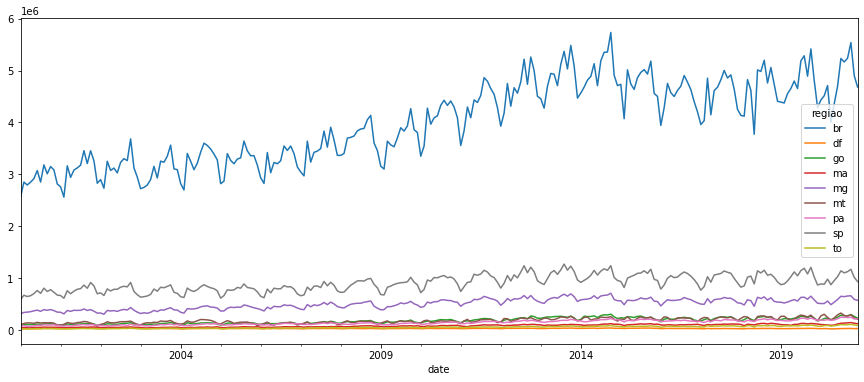

In [9]:
base_pivot.plot(figsize=(15,6))

## Decomposição dos dados por região

### Brasil

In [10]:
base_br = base_pivot[["br"]]
base_br

regiao               br
date                   
2000-01-01  2562814.939
2000-02-01  2851462.374
2000-03-01  2795766.194
2000-04-01  2850547.888
2000-05-01  2917605.671
...                 ...
2020-08-01  5164422.187
2020-09-01  5237175.795
2020-10-01  5537466.497
2020-11-01  4900948.094
2020-12-01  4681920.117

[252 rows x 1 columns]

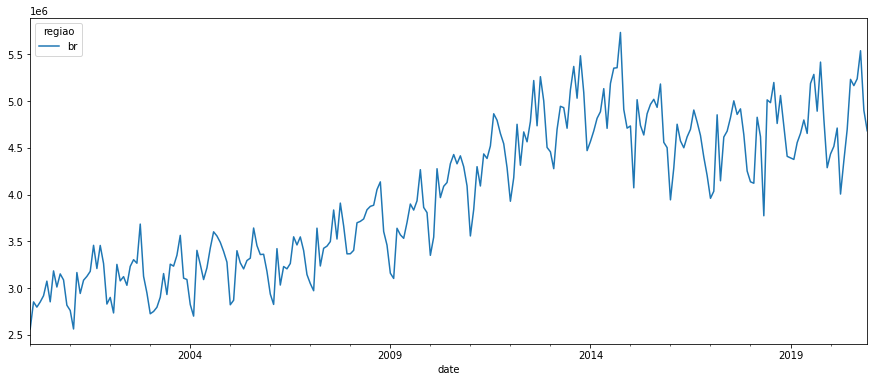

In [11]:
base_br.plot(figsize=(15,6))

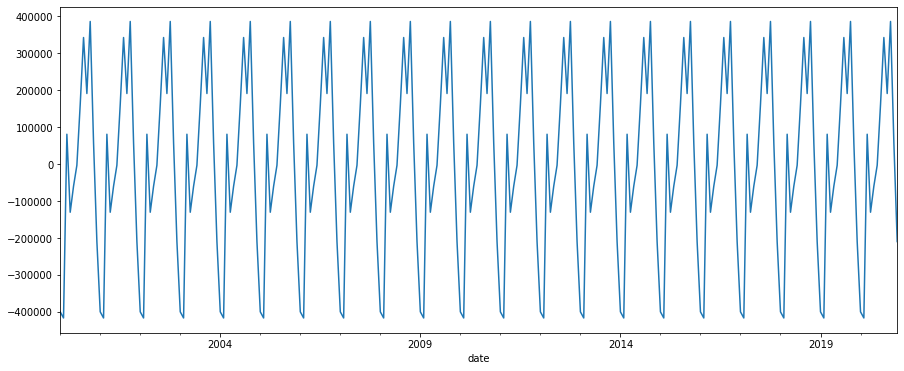

In [12]:
br_decomp = seasonal_decompose(base_br)
br_saz = br_decomp.seasonal
br_saz.plot(figsize=(15,6))

### Distrito Federal

In [13]:
base_df = base_pivot[["df"]]
base_df

regiao             df
date                 
2000-01-01  23310.896
2000-02-01  25967.743
2000-03-01  24590.674
2000-04-01  24975.963
2000-05-01  27224.597
...               ...
2020-08-01  31304.100
2020-09-01  31173.000
2020-10-01  33076.000
2020-11-01  28977.783
2020-12-01  32187.000

[252 rows x 1 columns]

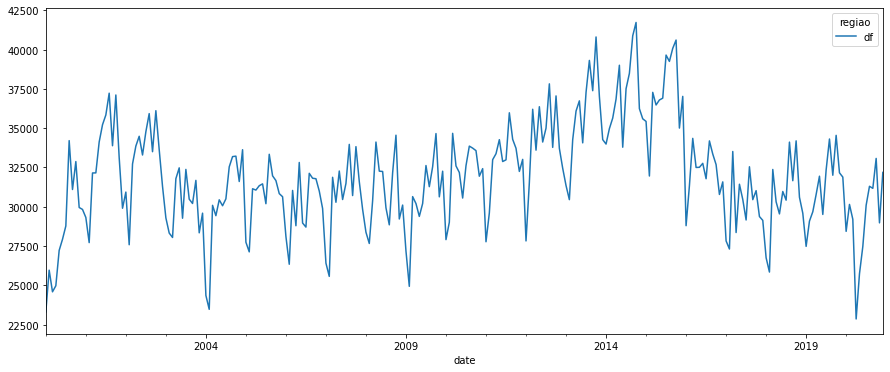

In [14]:
base_df.plot(figsize=(15,6))

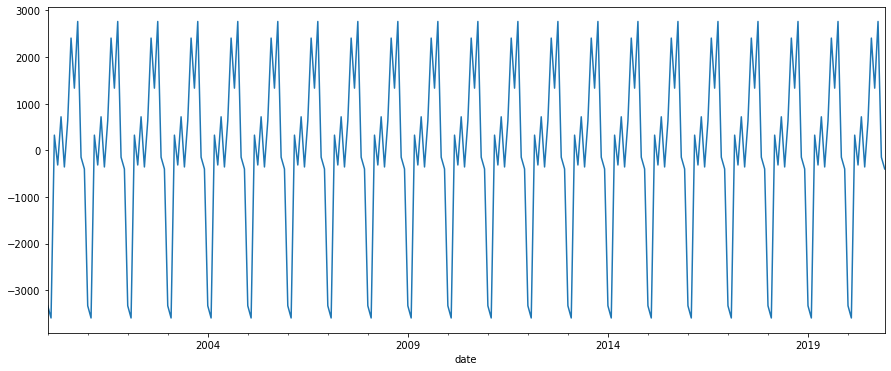

In [15]:
df_decomp = seasonal_decompose(base_df)
df_saz = df_decomp.seasonal
df_saz.plot(figsize=(15,6))

### Goiás

In [16]:
base_go = base_pivot[["go"]]
base_go

regiao              go
date                  
2000-01-01   87944.946
2000-02-01  101610.021
2000-03-01  106700.403
2000-04-01  107564.004
2000-05-01  108798.652
...                ...
2020-08-01  277198.970
2020-09-01  271930.630
2020-10-01  301963.125
2020-11-01  262224.592
2020-12-01  232885.183

[252 rows x 1 columns]

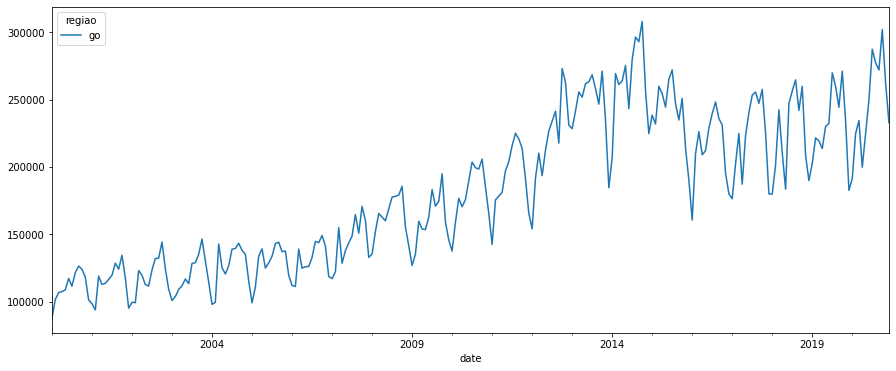

In [17]:
base_go.plot(figsize=(15,6))

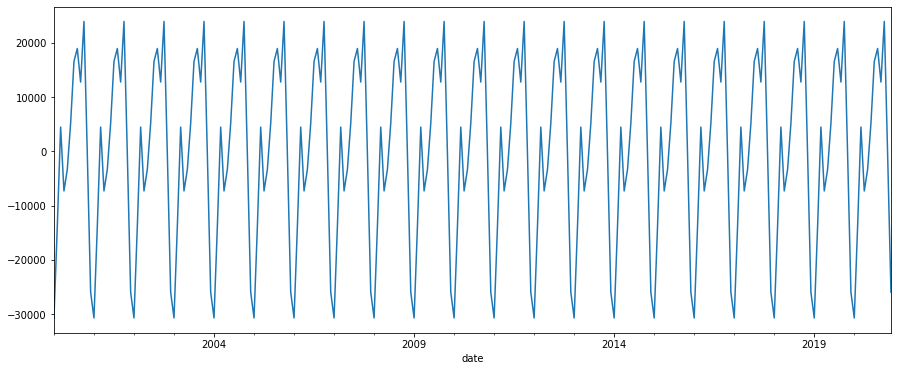

In [18]:
go_decomp = seasonal_decompose(base_go)
go_saz = go_decomp.seasonal
go_saz.plot(figsize=(15,6))

### Maranhão

In [19]:
base_ma = base_pivot[["ma"]]
base_ma

regiao              ma
date                  
2000-01-01   46337.618
2000-02-01   47762.196
2000-03-01   45887.571
2000-04-01   44513.438
2000-05-01   51793.296
...                ...
2020-08-01  136336.548
2020-09-01  140322.482
2020-10-01  146353.183
2020-11-01  133340.857
2020-12-01  124460.976

[252 rows x 1 columns]

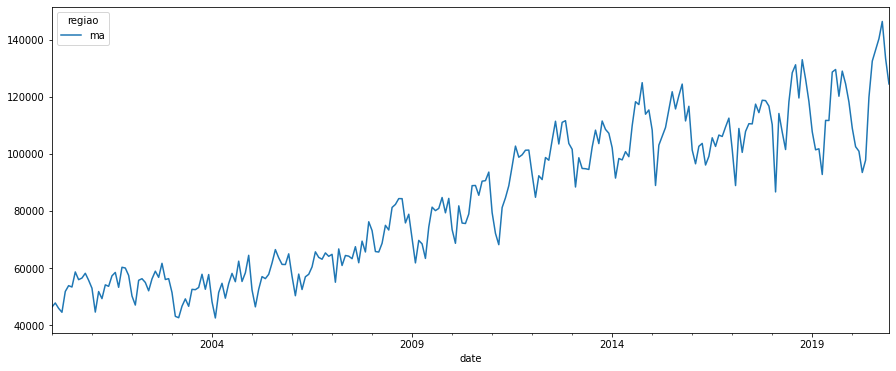

In [20]:
base_ma.plot(figsize=(15,6))

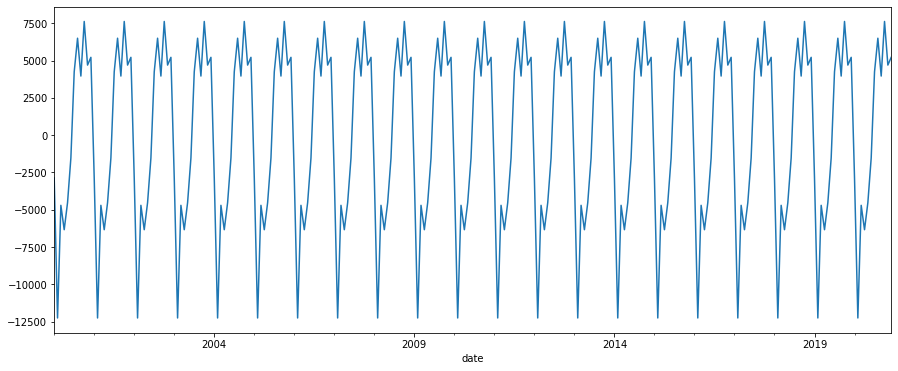

In [21]:
ma_decomp = seasonal_decompose(base_ma)
ma_saz = ma_decomp.seasonal
ma_saz.plot(figsize=(15,6))

### Minas Gerais

In [22]:
base_mg = base_pivot[["mg"]]
base_mg

regiao              mg
date                  
2000-01-01  314501.824
2000-02-01  342265.747
2000-03-01  346959.228
2000-04-01  355990.573
2000-05-01  372540.499
...                ...
2020-08-01  645429.139
2020-09-01  657632.661
2020-10-01  662250.193
2020-11-01  592951.354
2020-12-01  573835.748

[252 rows x 1 columns]

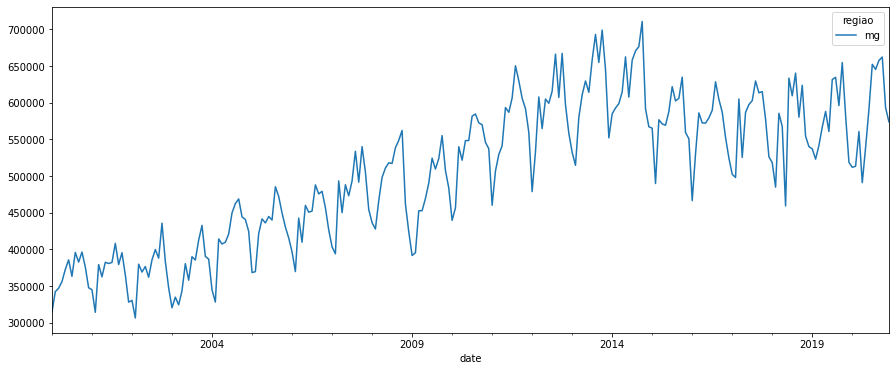

In [23]:
base_mg.plot(figsize=(15,6))

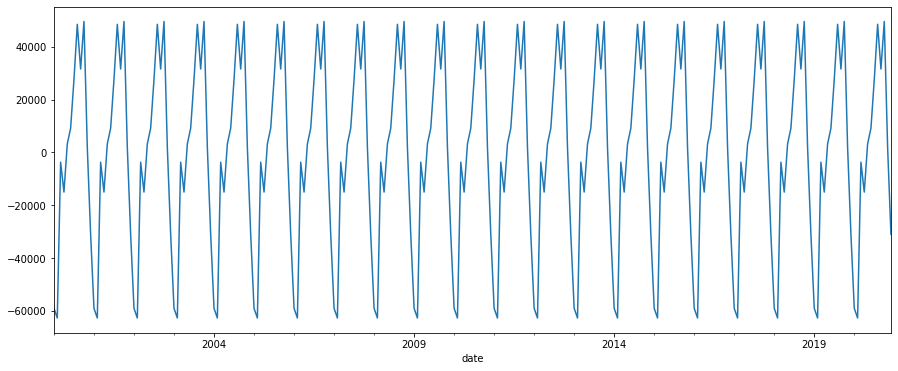

In [24]:
mg_decomp = seasonal_decompose(base_mg)
mg_saz = mg_decomp.seasonal
mg_saz.plot(figsize=(15,6))

### Mato Grosso

In [25]:
base_mt = base_pivot[["mt"]]
base_mt

regiao              mt
date                  
2000-01-01  103352.364
2000-02-01  129045.770
2000-03-01  140906.429
2000-04-01  138921.684
2000-05-01  132113.953
...                ...
2020-08-01  283102.747
2020-09-01  271472.229
2020-10-01  297223.827
2020-11-01  233708.999
2020-12-01  210883.146

[252 rows x 1 columns]

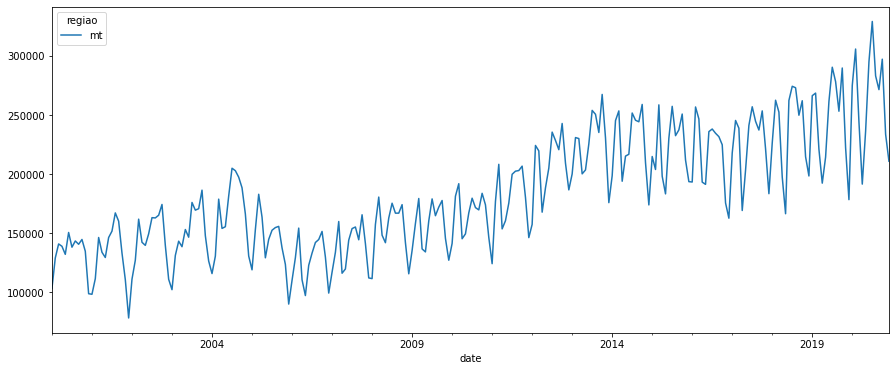

In [26]:
base_mt.plot(figsize=(15,6))

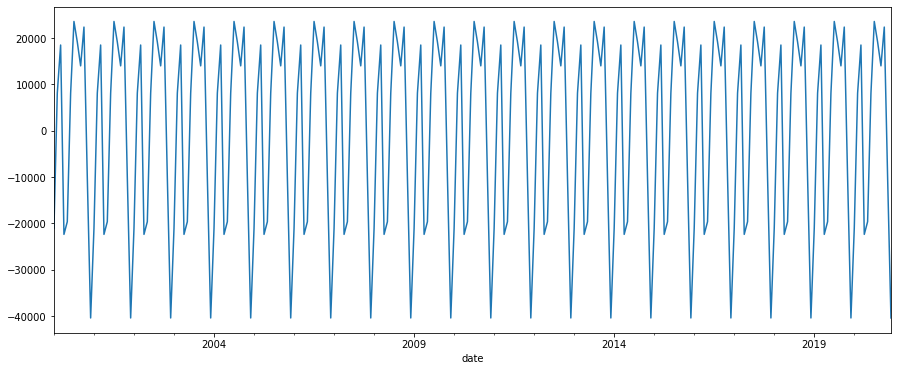

In [27]:
mt_decomp = seasonal_decompose(base_mt)
mt_saz = mt_decomp.seasonal
mt_saz.plot(figsize=(15,6))

### Pará

In [28]:
base_pa = base_pivot[["pa"]]
base_pa

regiao              pa
date                  
2000-01-01   78637.609
2000-02-01   86689.774
2000-03-01   72641.028
2000-04-01   72608.689
2000-05-01   83180.820
...                ...
2020-08-01  246890.088
2020-09-01  244189.810
2020-10-01  248290.000
2020-11-01  216643.488
2020-12-01  218677.580

[252 rows x 1 columns]

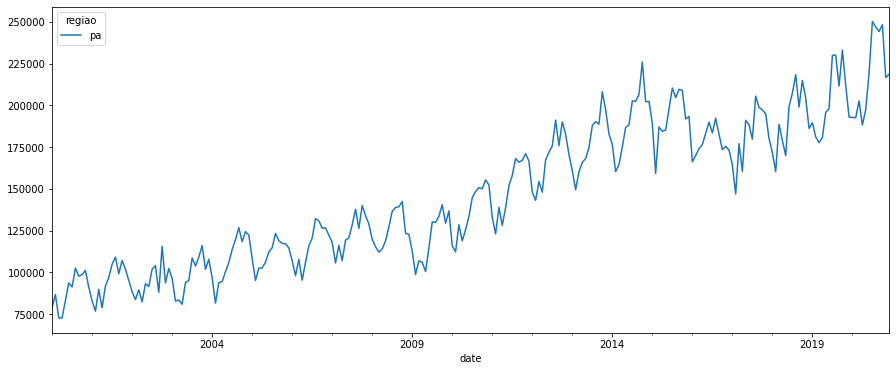

In [29]:
base_pa.plot(figsize=(15,6))

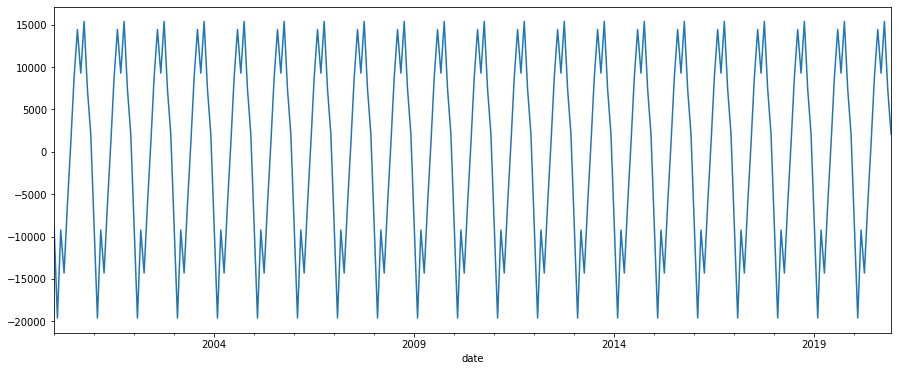

In [30]:
pa_decomp = seasonal_decompose(base_pa)
pa_saz = pa_decomp.seasonal
pa_saz.plot(figsize=(15,6))

### São Paulo

In [31]:
base_sp = base_pivot[["sp"]]
base_sp

regiao               sp
date                   
2000-01-01   594406.648
2000-02-01   671903.264
2000-03-01   647752.548
2000-04-01   663193.902
2000-05-01   703252.142
...                 ...
2020-08-01  1103391.024
2020-09-01  1126664.382
2020-10-01  1171311.593
2020-11-01  1015958.362
2020-12-01   935649.534

[252 rows x 1 columns]

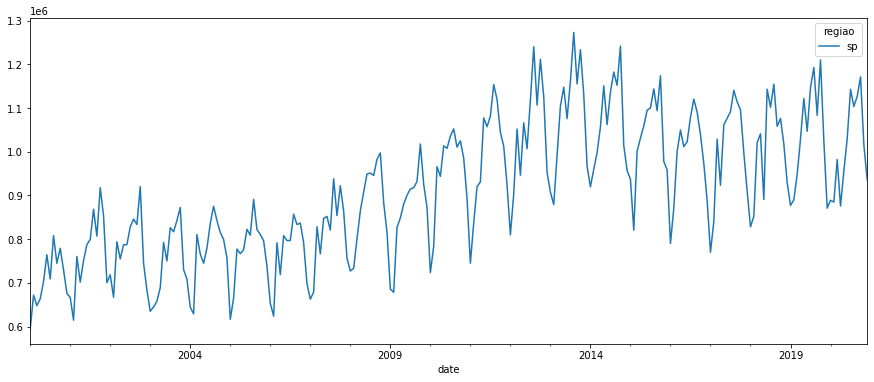

In [32]:
base_sp.plot(figsize=(15,6))

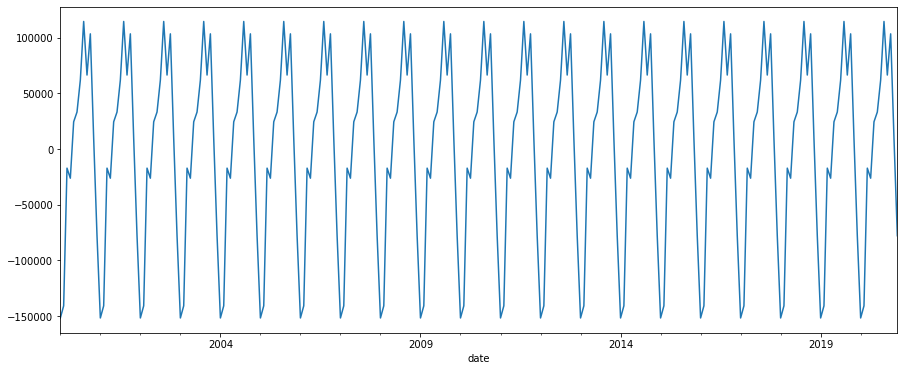

In [33]:
sp_decomp = seasonal_decompose(base_sp)
sp_saz = sp_decomp.seasonal
sp_saz.plot(figsize=(15,6))

### Tocantins

In [34]:
base_to = base_pivot[["to"]]
base_to

regiao              to
date                  
2000-01-01   26250.620
2000-02-01   27309.824
2000-03-01   24847.765
2000-04-01   25427.129
2000-05-01   28248.445
...                ...
2020-08-01  103669.820
2020-09-01  104025.150
2020-10-01  111494.370
2020-11-01   99911.070
2020-12-01   91311.120

[252 rows x 1 columns]

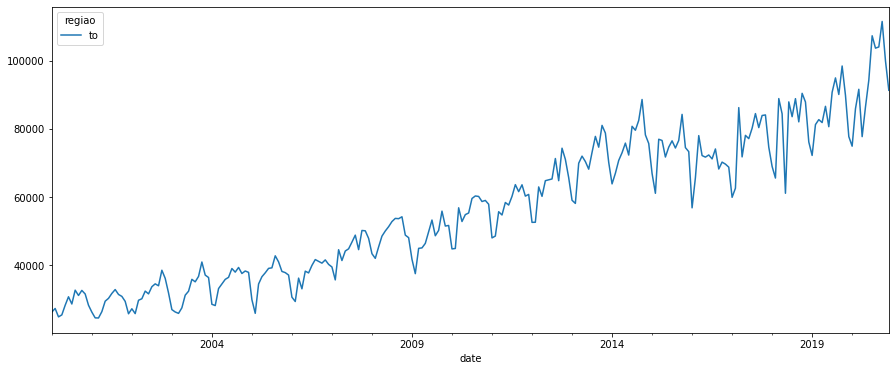

In [35]:
base_to.plot(figsize=(15,6))

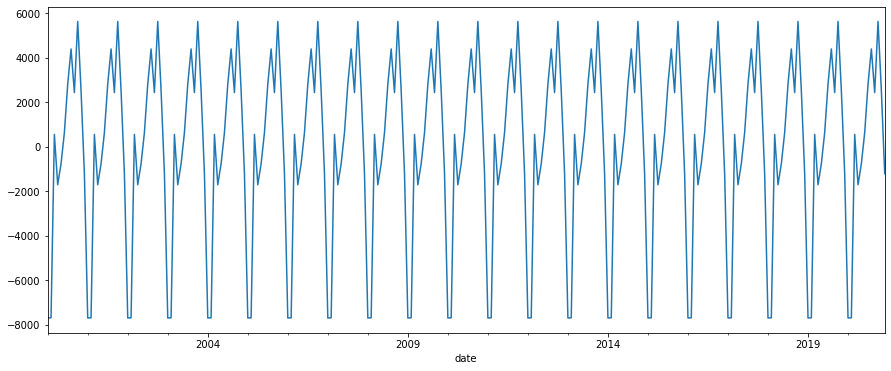

In [36]:
to_decomp = seasonal_decompose(base_to)
to_saz = to_decomp.seasonal
to_saz.plot(figsize=(15,6))

## Análise da sazonalidade nos estados

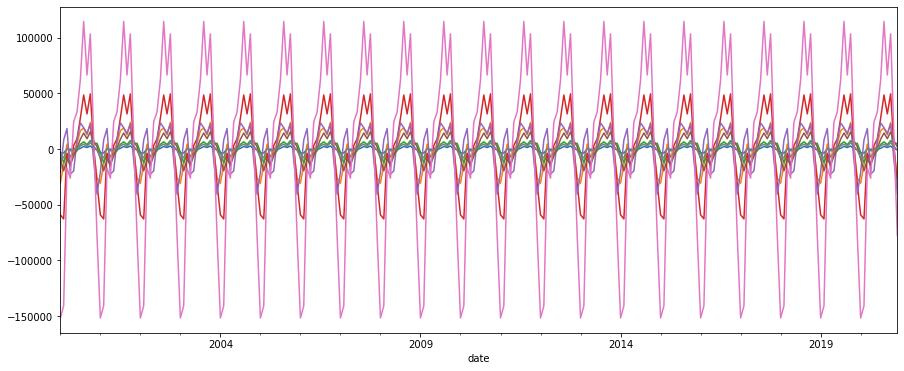

In [37]:
df_saz.plot(figsize=(15,6))
go_saz.plot(figsize=(15,6))
ma_saz.plot(figsize=(15,6))
mg_saz.plot(figsize=(15,6))
mt_saz.plot(figsize=(15,6))
pa_saz.plot(figsize=(15,6))
sp_saz.plot(figsize=(15,6))
to_saz.plot(figsize=(15,6))

## Distribuição do consumo por estado

In [38]:
# Tratando base para obter o consumo do último mês de 2020 distribuído por estados

base_dist = base_tratada.pivot(index="regiao", columns="date",values="value").reset_index()

base_dist = base_dist[["regiao", datetime(2020, 12, 1, 0, 0, 0)]]
base_dist = base_dist.rename(columns={datetime(2020, 12, 1, 0, 0, 0): "values"})

base_dist = base_dist[base_dist["regiao"].apply(lambda x: "br" not in x)]

base_dist

date regiao      values
1        df   32187.000
2        go  232885.183
3        ma  124460.976
4        mg  573835.748
5        mt  210883.146
6        pa  218677.580
7        sp  935649.534
8        to   91311.120

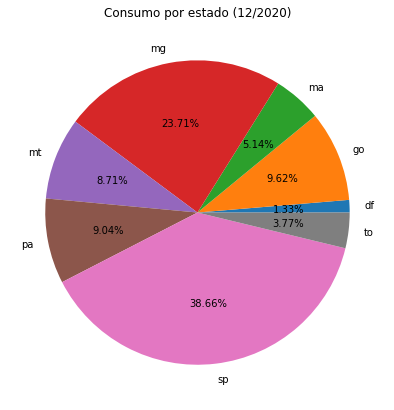

In [152]:
labels_dist = base_dist['regiao'].tolist()
data_dist = base_dist['values'].astype(int).tolist()

fig, ax = plt.subplots(figsize=(10,7))

ax.pie(data_dist, labels = labels_dist, autopct='%.2f%%')
ax.set_title('Consumo por estado (12/2020)', fontsize=12)
plt.show()

## Tamanho do mercado e sua evolução nos últimos 5 anos

In [40]:
base_br

regiao               br
date                   
2000-01-01  2562814.939
2000-02-01  2851462.374
2000-03-01  2795766.194
2000-04-01  2850547.888
2000-05-01  2917605.671
...                 ...
2020-08-01  5164422.187
2020-09-01  5237175.795
2020-10-01  5537466.497
2020-11-01  4900948.094
2020-12-01  4681920.117

[252 rows x 1 columns]

In [41]:
# Identificando últimos 5 anos (2016 a 2020)

br_ult_cinco = base_br.iloc[(252-(5*12)):252,]
br_ult_cinco

regiao               br
date                   
2016-01-01  3942869.983
2016-02-01  4284566.795
2016-03-01  4751359.450
2016-04-01  4572943.980
2016-05-01  4499732.576
2016-06-01  4616496.481
2016-07-01  4697056.958
2016-08-01  4903384.937
2016-09-01  4775598.223
2016-10-01  4631472.072
2016-11-01  4400045.949
2016-12-01  4203042.669
2017-01-01  3959166.652
2017-02-01  4034946.436
2017-03-01  4852097.246
2017-04-01  4146623.924
2017-05-01  4614686.957
2017-06-01  4677453.593
2017-07-01  4821464.448
2017-08-01  5001582.490
2017-09-01  4856584.101
2017-10-01  4915778.464
2017-11-01  4640681.925
2017-12-01  4251226.249
2018-01-01  4135742.427
2018-02-01  4120481.712
2018-03-01  4825773.443
2018-04-01  4618470.220
2018-05-01  3772603.274
2018-06-01  5011752.437
2018-07-01  4982153.478
2018-08-01  5197649.583
2018-09-01  4759700.970
2018-10-01  5058821.472
2018-11-01  4738254.634
2018-12-01  4408063.522
2019-01-01  4391503.430
2019-02-01  4375219.448
2019-03-01  4554752.796
2019-04-01  4653654.395
2019-05-01  4796717.560
2019-06-01  4653210.841
2019-07-01  5187031.607
2019-08-01  5284080.566
2019-09-01  4891110.988
2019-10-01  5415773.434
2019-11-01  4808784.153
2019-12-01  4286608.506
2020-01-01  4432971.261
2020-02-01  4514231.523
2020-03-01  4710564.495
2020-04-01  4004816.903
2020-05-01  4360350.294
2020-06-01  4696043.355
2020-07-01  5231145.791
2020-08-01  5164422.187
2020-09-01  5237175.795
2020-10-01  5537466.497
2020-11-01  4900948.094
2020-12-01  4681920.117

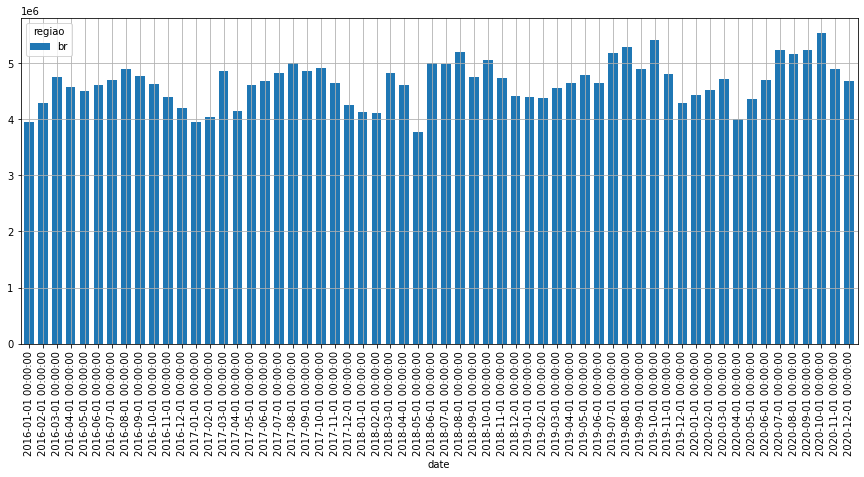

In [42]:
br_ult_cinco.plot.bar(width=0.7, grid=True, figsize=(15, 6))

# Gasolina

## Importação e verificação dos dados

In [43]:
base_gasolina = pd.read_excel("/content/drive/MyDrive/dados_desafiodatascientistintern_vendas_distribuidoras_anp.xlsx", sheet_name="gasolina")
base_gasolina

regiao  meses         2000         2001         2002         2003  \
0       df      1    39257.909    43521.369    45462.062    46092.892   
1       df      2    49569.772    45959.105    46632.840    46795.139   
2       df      3    48423.406    53413.960    54799.626    46540.788   
3       df      4    48553.004    51834.828    54941.682    52070.414   
4       df      5    51085.485    54050.445    55629.226    56324.430   
..     ...    ...          ...          ...          ...          ...   
103     br      8  1847762.530  1909391.427  1857340.973  1800039.337   
104     br      9  1885877.506  1794802.949  1839996.006  1836582.491   
105     br     10  1919652.681  1868047.799  2104498.526  1986192.771   
106     br     11  1875820.823  1791888.219  1736800.414  1819878.529   
107     br     12  1998116.522  1883374.360  2083102.826  2187310.676   

            2004         2005         2006          2007  ...         2011  \
0      47058.726    50111.624    52252.294  5.715583e+04  ...    66866.000   
1      48641.098    51757.881    55474.065  5.619687e+04  ...    76108.800   
2      60296.752    63408.996    64740.953  6.973604e+04  ...    83453.227   
3      60319.124    60723.717    59829.875  6.292152e+04  ...    84804.941   
4      57218.569    60511.293    64139.287  6.446930e+04  ...    85729.000   
..           ...          ...          ...           ...  ...          ...   
103  1941597.387  2053536.868  2062840.697  2.069937e+06  ...  3022669.677   
104  2012720.941  1984885.207  2052914.447  1.923142e+06  ...  3063238.858   
105  1942845.528  1873754.298  2022895.230  2.121191e+06  ...  3009695.524   
106  1876476.946  1920306.078  1961920.410  2.016819e+06  ...  3066216.095   
107  2221233.886  2229874.839  2246973.287  2.273262e+06  ...  3556762.904   

            2012         2013         2014         2015         2016  \
0      75651.000    81217.500    86100.219    89940.500    79615.000   
1      81323.000    77177.419    91652.000    79576.000    88533.900   
2      93703.100    93268.000    96199.560    94582.500   101570.350   
3      87770.274    95929.500   100157.600    93805.583    97427.800   
4      93357.716    96250.009   102042.171    93644.809    97517.500   
..           ...          ...          ...          ...          ...   
103  3443751.147  3586453.296  3703508.339  3289414.439  3553375.614   
104  3251623.959  3372566.564  3777758.486  3315073.841  3583991.917   
105  3570055.057  3648718.590  4000745.337  3475017.575  3620869.402   
106  3321685.265  3578908.929  3537267.449  3249604.876  3706914.296   
107  3769116.280  3865631.917  4187054.611  3944376.797  4222508.922   

            2017         2018         2019         2020  
0      98114.200    91289.745    87198.500    88126.310  
1      98780.300    89551.196    90284.500    93967.000  
2     115341.451   111130.031    95555.378    78579.000  
3     105559.895   101124.803    93018.492    60537.500  
4     112863.400    89603.470    93025.000    70625.036  
..           ...          ...          ...          ...  
103  3695580.263  3197553.423  3257545.299  2933072.544  
104  3500534.965  2887525.073  3088984.445  3127219.046  
105  3538792.814  3053220.141  3322277.250  3390764.563  
106  3434291.149  3018897.469  3219828.551  3217673.158  
107  3856485.440  3456346.661  3563035.328  3716766.189  

[108 rows x 23 columns]

In [44]:
base_gasolina.dtypes

regiao     object
meses       int64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object

In [45]:
base_gasolina.isnull().sum()

regiao    0
meses     0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
dtype: int64

In [46]:
base_gasolina.describe()

meses          2000          2001          2002          2003  \
count  108.000000  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean     6.500000  3.208322e+05  3.166980e+05  3.198725e+05  3.073649e+05   
std      3.468146  5.862638e+05  5.758417e+05  5.844402e+05  5.635677e+05   
min      1.000000  6.616280e+03  6.896216e+03  7.770183e+03  7.063573e+03   
25%      3.750000  2.234035e+04  2.367579e+04  2.480736e+04  2.411727e+04   
50%      6.500000  4.953587e+04  5.139187e+04  5.466867e+04  5.384660e+04   
75%      9.250000  1.974726e+05  1.910010e+05  1.980647e+05  1.963108e+05   
max     12.000000  2.011256e+06  1.940547e+06  2.104499e+06  2.187311e+06   

               2004          2005          2006          2007          2008  \
count  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean   3.252338e+05  3.319625e+05  3.390177e+05  3.448593e+05  3.544042e+05   
std    5.951558e+05  6.051817e+05  6.161440e+05  6.241806e+05  6.444098e+05   
min    8.757487e+03  8.933688e+03  9.126852e+03  1.111970e+04  1.255580e+04   
25%    2.853307e+04  2.948929e+04  2.938320e+04  2.958744e+04  3.055886e+04   
50%    5.995377e+04  6.061750e+04  6.384388e+04  6.027227e+04  6.513070e+04   
75%    2.160154e+05  2.214355e+05  2.294197e+05  2.386969e+05  2.530590e+05   
max    2.221234e+06  2.229875e+06  2.246973e+06  2.273262e+06  2.398995e+06   

       ...          2011          2012          2013          2014  \
count  ...  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean   ...  4.948814e+05  5.512744e+05  5.732387e+05  6.112122e+05   
std    ...  9.106745e+05  1.013490e+06  1.056832e+06  1.130166e+06   
min    ...  1.732563e+04  2.109954e+04  2.121414e+04  2.504850e+04   
25%    ...  4.980742e+04  5.800019e+04  6.444050e+04  7.061254e+04   
50%    ...  8.526697e+04  9.353041e+04  9.522829e+04  1.010999e+05   
75%    ...  3.501241e+05  3.783518e+05  4.030305e+05  4.231845e+05   
max    ...  3.556763e+06  3.769116e+06  3.865632e+06  4.187055e+06   

               2015          2016          2017          2018          2019  \
count  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean   5.592437e+05  5.862598e+05  6.030500e+05  5.149517e+05  5.059657e+05   
std    1.047496e+06  1.095282e+06  1.122789e+06  9.761052e+05  9.698581e+05   
min    2.507840e+04  2.670405e+04  2.790684e+04  2.660613e+04  2.749248e+04   
25%    7.133138e+04  7.453035e+04  7.855956e+04  7.504887e+04  7.637913e+04   
50%    9.675180e+04  1.034453e+05  1.056857e+05  9.502694e+04  9.513071e+04   
75%    3.664269e+05  3.825547e+05  3.999617e+05  3.203890e+05  2.794523e+05   
max    3.944377e+06  4.222509e+06  3.948916e+06  3.625937e+06  3.563035e+06   

               2020  
count  1.080000e+02  
mean   4.750779e+05  
std    9.168154e+05  
min    2.492354e+04  
25%    6.476938e+04  
50%    9.284081e+04  
75%    2.818908e+05  
max    3.716766e+06  

[8 rows x 22 columns]

## Tratamento dos dados

In [47]:
# Renomeação de colunas (int -> str)
dicio = {}

for i in range(2000, 2021):
    dicio[i] = str(i)

base_gasolina = base_gasolina.rename(columns=dicio)

dicio

{2000: '2000',
 2001: '2001',
 2002: '2002',
 2003: '2003',
 2004: '2004',
 2005: '2005',
 2006: '2006',
 2007: '2007',
 2008: '2008',
 2009: '2009',
 2010: '2010',
 2011: '2011',
 2012: '2012',
 2013: '2013',
 2014: '2014',
 2015: '2015',
 2016: '2016',
 2017: '2017',
 2018: '2018',
 2019: '2019',
 2020: '2020'}

In [48]:
# Concluindo tratamento e adicionando data

base_gasolina_tratada = pd.melt(base_gasolina, id_vars=['meses', 'regiao'], value_vars=[str(i) for i in range(2000,2021)])
base_gasolina_tratada['date'] = base_gasolina_tratada['variable'].astype(str) + '-' + base_gasolina_tratada["meses"].astype(str) + '-01'
base_gasolina_tratada.date = pd.to_datetime(base_gasolina_tratada.date)
base_gasolina_tratada

meses regiao variable        value       date
0         1     df     2000    39257.909 2000-01-01
1         2     df     2000    49569.772 2000-02-01
2         3     df     2000    48423.406 2000-03-01
3         4     df     2000    48553.004 2000-04-01
4         5     df     2000    51085.485 2000-05-01
...     ...    ...      ...          ...        ...
2263      8     br     2020  2933072.544 2020-08-01
2264      9     br     2020  3127219.046 2020-09-01
2265     10     br     2020  3390764.563 2020-10-01
2266     11     br     2020  3217673.158 2020-11-01
2267     12     br     2020  3716766.189 2020-12-01

[2268 rows x 5 columns]

In [49]:
# Pivotando tabela e colocando em ordem

base_gasolina_pivot = base_gasolina_tratada.pivot(index="date", columns="regiao",values="value")
base_gasolina_pivot = base_gasolina_pivot.sort_values("date")
base_gasolina_pivot

regiao               br         df          go         ma          mg  \
date                                                                    
2000-01-01  1810572.096  39257.909   58254.692  16751.080  182555.481   
2000-02-01  1966364.759  49569.772   60709.113  17985.405  195290.073   
2000-03-01  1801197.989  48423.406   56363.192  15357.750  181880.336   
2000-04-01  1863561.899  48553.004   59585.032  15875.728  193518.502   
2000-05-01  1869175.737  51085.485   60409.112  16719.970  194328.450   
...                 ...        ...         ...        ...         ...   
2020-08-01  2933072.544  76607.922   91369.050  81163.076  263899.223   
2020-09-01  3127219.046  77126.961   95579.430  85907.410  280929.706   
2020-10-01  3390764.563  84383.021  107087.131  91882.210  294571.960   
2020-11-01  3217673.158  81774.394   98974.850  85702.180  284774.004   
2020-12-01  3716766.189  95159.739  118610.930  96173.890  333219.017   

regiao             mt          pa          sp         to  
date                                                      
2000-01-01  20899.358   28830.479  579928.009   6961.518  
2000-02-01  23245.280   32297.047  643248.094   7027.916  
2000-03-01  21682.924   27310.979  605500.410   6616.280  
2000-04-01  21881.813   29396.384  618650.177   6699.691  
2000-05-01  24084.058   26511.009  614461.497   7174.920  
...               ...         ...         ...        ...  
2020-08-01  39770.238  108408.421  592108.006  28500.950  
2020-09-01  42618.920  112583.203  632812.881  30233.690  
2020-10-01  44769.386  118580.661  672522.731  32556.270  
2020-11-01  45183.068  110933.749  655609.737  31717.360  
2020-12-01  54540.978  125267.662  760385.479  36449.880  

[252 rows x 9 columns]

## Série temporal do consumo das regiões

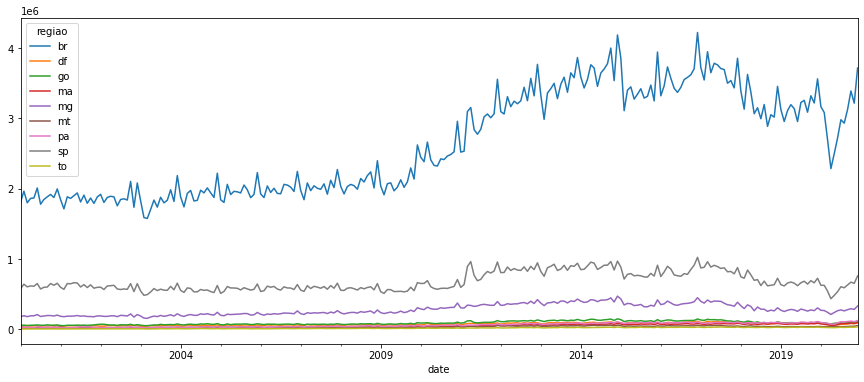

In [50]:
base_gasolina_pivot.plot(figsize=(15,6))

## Decomposição dos dados por região

### Brasil

In [51]:
base_gasolina_br = base_gasolina_pivot[["br"]]
base_gasolina_br

regiao               br
date                   
2000-01-01  1810572.096
2000-02-01  1966364.759
2000-03-01  1801197.989
2000-04-01  1863561.899
2000-05-01  1869175.737
...                 ...
2020-08-01  2933072.544
2020-09-01  3127219.046
2020-10-01  3390764.563
2020-11-01  3217673.158
2020-12-01  3716766.189

[252 rows x 1 columns]

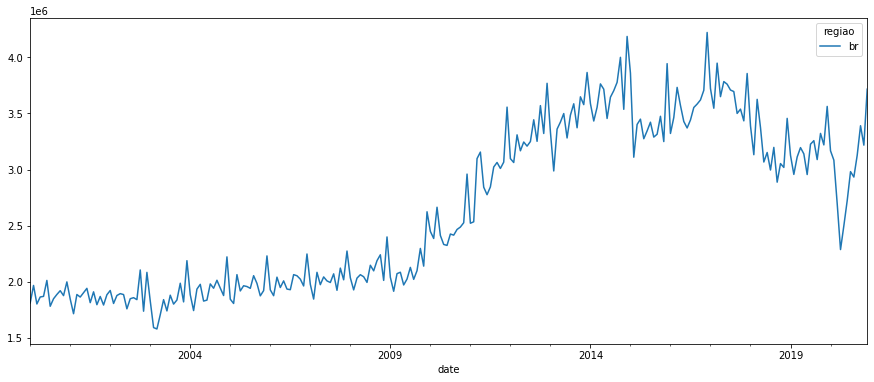

In [52]:
base_gasolina_br.plot(figsize=(15,6))

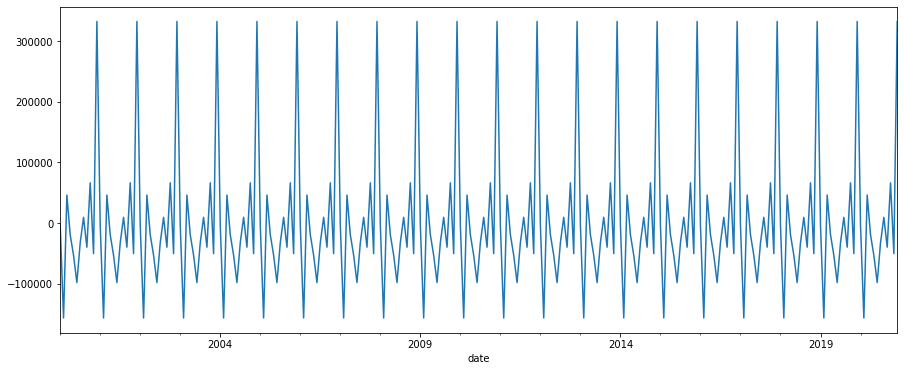

In [53]:
br_gasolina_decomp = seasonal_decompose(base_gasolina_br)
br_gasolina_saz = br_gasolina_decomp.seasonal
br_gasolina_saz.plot(figsize=(15,6))

### Distrito Federal

In [54]:
base_gasolina_df = base_gasolina_pivot[["df"]]
base_gasolina_df

regiao             df
date                 
2000-01-01  39257.909
2000-02-01  49569.772
2000-03-01  48423.406
2000-04-01  48553.004
2000-05-01  51085.485
...               ...
2020-08-01  76607.922
2020-09-01  77126.961
2020-10-01  84383.021
2020-11-01  81774.394
2020-12-01  95159.739

[252 rows x 1 columns]

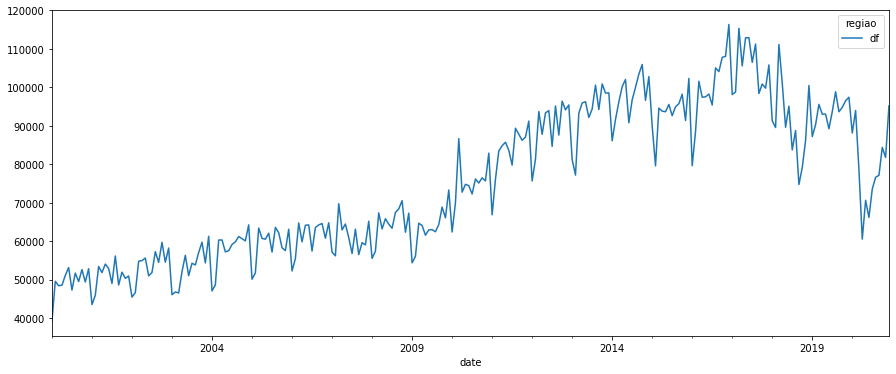

In [55]:
base_gasolina_df.plot(figsize=(15,6))

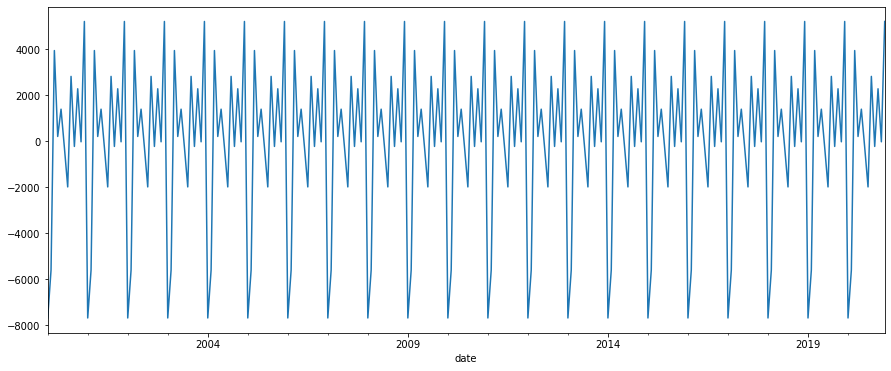

In [56]:
df_gasolina_decomp = seasonal_decompose(base_gasolina_df)
df_gasolina_saz = df_gasolina_decomp.seasonal
df_gasolina_saz.plot(figsize=(15,6))

### Goiás

In [57]:
base_gasolina_go = base_gasolina_pivot[["go"]]
base_gasolina_go

regiao              go
date                  
2000-01-01   58254.692
2000-02-01   60709.113
2000-03-01   56363.192
2000-04-01   59585.032
2000-05-01   60409.112
...                ...
2020-08-01   91369.050
2020-09-01   95579.430
2020-10-01  107087.131
2020-11-01   98974.850
2020-12-01  118610.930

[252 rows x 1 columns]

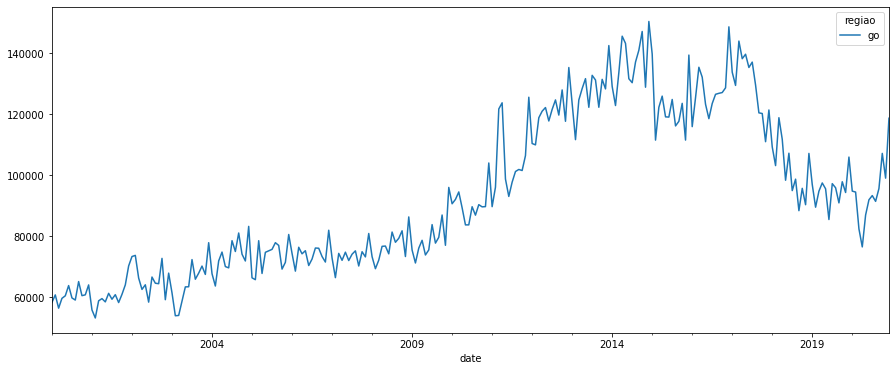

In [58]:
base_gasolina_go.plot(figsize=(15,6))

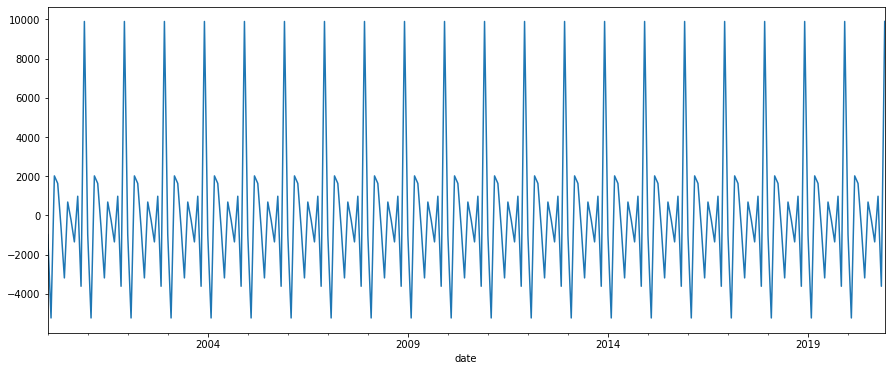

In [59]:
go_gasolina_decomp = seasonal_decompose(base_gasolina_go)
go_gasolina_saz = go_gasolina_decomp.seasonal
go_gasolina_saz.plot(figsize=(15,6))

### Maranhão

In [60]:
base_gasolina_ma = base_gasolina_pivot[["ma"]]
base_gasolina_ma

regiao             ma
date                 
2000-01-01  16751.080
2000-02-01  17985.405
2000-03-01  15357.750
2000-04-01  15875.728
2000-05-01  16719.970
...               ...
2020-08-01  81163.076
2020-09-01  85907.410
2020-10-01  91882.210
2020-11-01  85702.180
2020-12-01  96173.890

[252 rows x 1 columns]

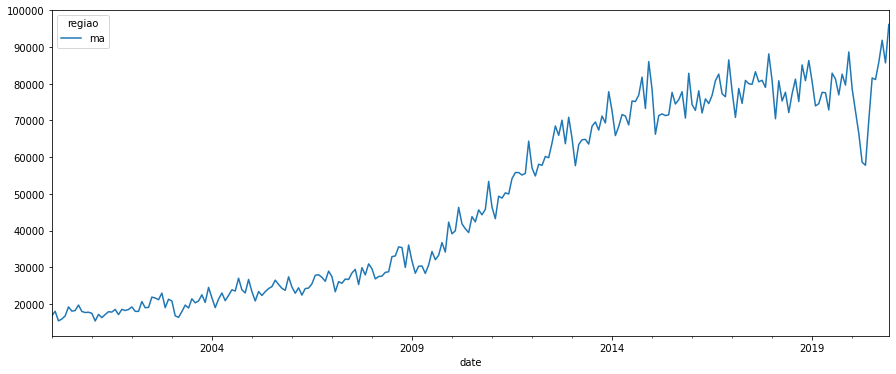

In [61]:
base_gasolina_ma.plot(figsize=(15,6))

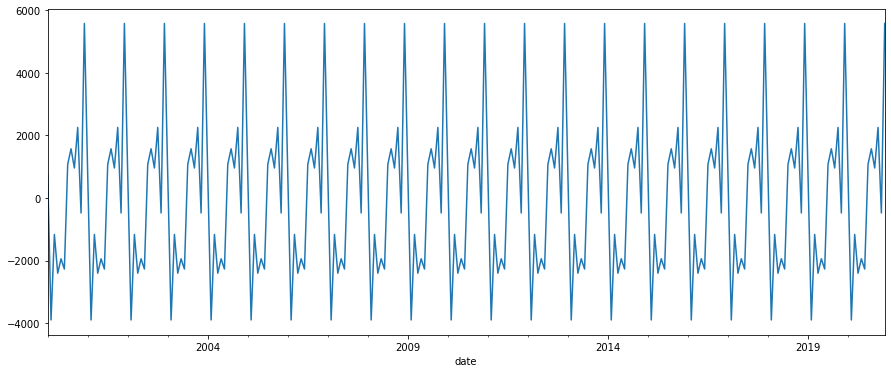

In [62]:
ma_gasolina_decomp = seasonal_decompose(base_gasolina_ma)
ma_gasolina_saz = ma_gasolina_decomp.seasonal
ma_gasolina_saz.plot(figsize=(15,6))

### Minas Gerais

In [63]:
base_gasolina_mg = base_gasolina_pivot[["mg"]]
base_gasolina_mg

regiao              mg
date                  
2000-01-01  182555.481
2000-02-01  195290.073
2000-03-01  181880.336
2000-04-01  193518.502
2000-05-01  194328.450
...                ...
2020-08-01  263899.223
2020-09-01  280929.706
2020-10-01  294571.960
2020-11-01  284774.004
2020-12-01  333219.017

[252 rows x 1 columns]

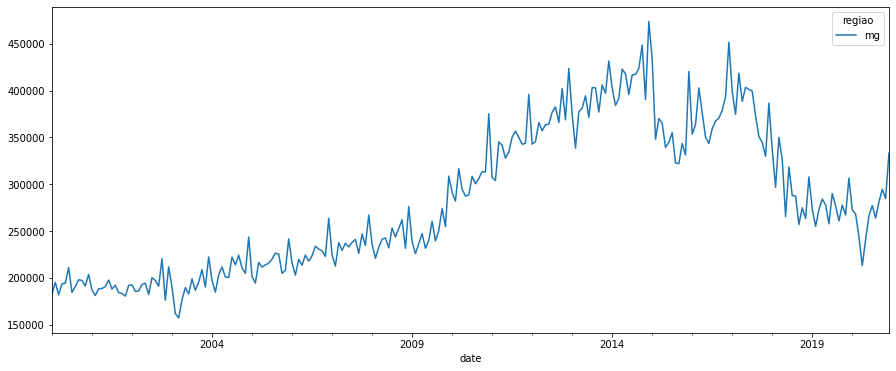

In [64]:
base_gasolina_mg.plot(figsize=(15,6))

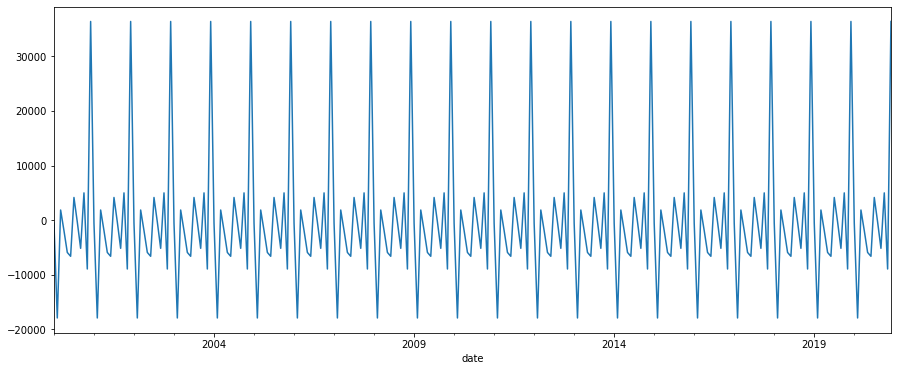

In [65]:
mg_gasolina_decomp = seasonal_decompose(base_gasolina_mg)
mg_gasolina_saz = mg_gasolina_decomp.seasonal
mg_gasolina_saz.plot(figsize=(15,6))

### Mato Grosso

In [66]:
base_gasolina_mt = base_gasolina_pivot[["mt"]]
base_gasolina_mt

regiao             mt
date                 
2000-01-01  20899.358
2000-02-01  23245.280
2000-03-01  21682.924
2000-04-01  21881.813
2000-05-01  24084.058
...               ...
2020-08-01  39770.238
2020-09-01  42618.920
2020-10-01  44769.386
2020-11-01  45183.068
2020-12-01  54540.978

[252 rows x 1 columns]

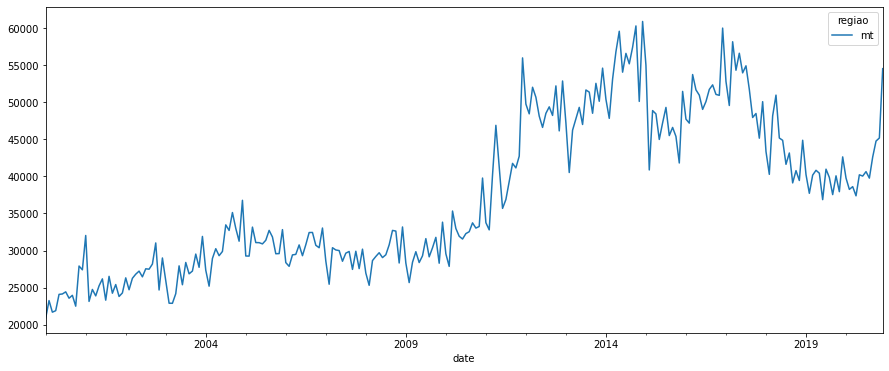

In [67]:
base_gasolina_mt.plot(figsize=(15,6))

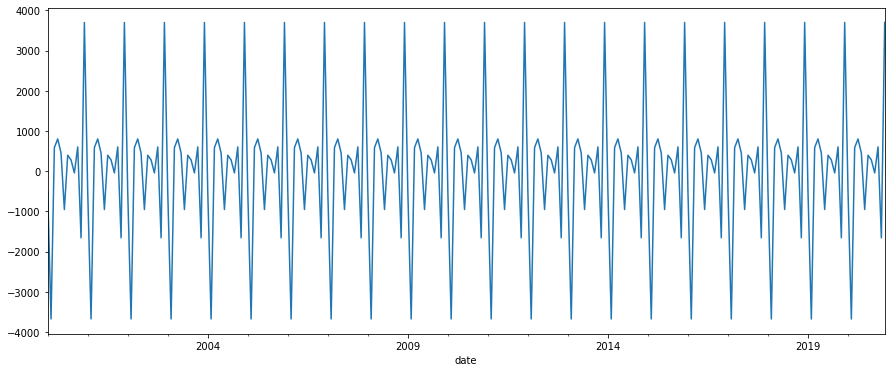

In [68]:
mt_gasolina_decomp = seasonal_decompose(base_gasolina_mt)
mt_gasolina_saz = mt_gasolina_decomp.seasonal
mt_gasolina_saz.plot(figsize=(15,6))

### Pará

In [69]:
base_gasolina_pa = base_gasolina_pivot[["pa"]]
base_gasolina_pa

regiao              pa
date                  
2000-01-01   28830.479
2000-02-01   32297.047
2000-03-01   27310.979
2000-04-01   29396.384
2000-05-01   26511.009
...                ...
2020-08-01  108408.421
2020-09-01  112583.203
2020-10-01  118580.661
2020-11-01  110933.749
2020-12-01  125267.662

[252 rows x 1 columns]

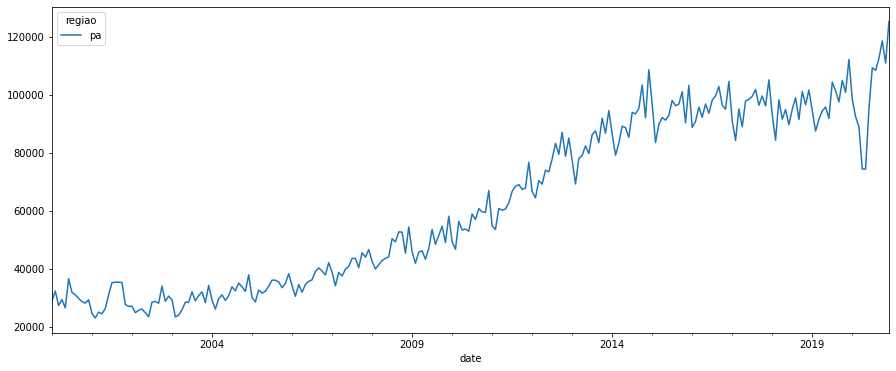

In [70]:
base_gasolina_pa.plot(figsize=(15,6))

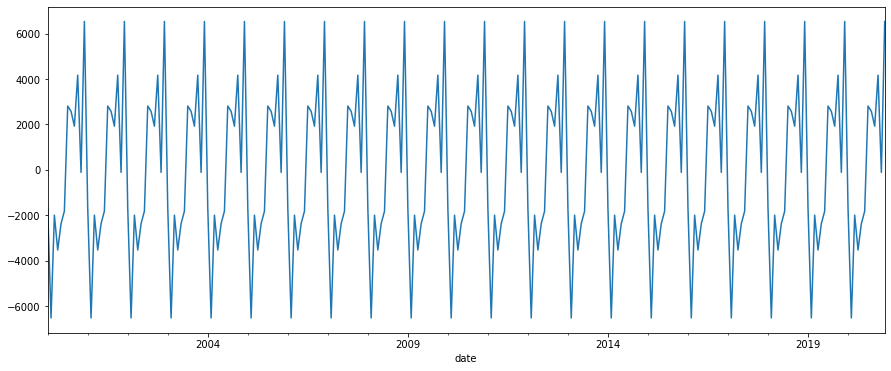

In [71]:
pa_gasolina_decomp = seasonal_decompose(base_gasolina_pa)
pa_gasolina_saz = pa_gasolina_decomp.seasonal
pa_gasolina_saz.plot(figsize=(15,6))

### São Paulo

In [72]:
base_gasolina_sp = base_gasolina_pivot[["sp"]]
base_gasolina_sp

regiao              sp
date                  
2000-01-01  579928.009
2000-02-01  643248.094
2000-03-01  605500.410
2000-04-01  618650.177
2000-05-01  614461.497
...                ...
2020-08-01  592108.006
2020-09-01  632812.881
2020-10-01  672522.731
2020-11-01  655609.737
2020-12-01  760385.479

[252 rows x 1 columns]

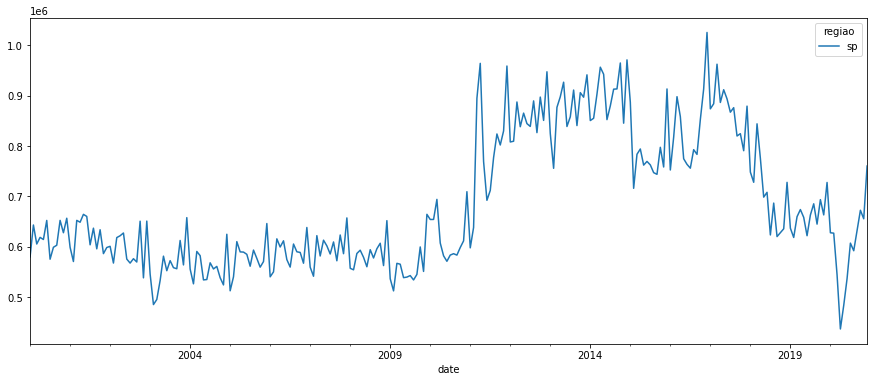

In [73]:
base_gasolina_sp.plot(figsize=(15,6))

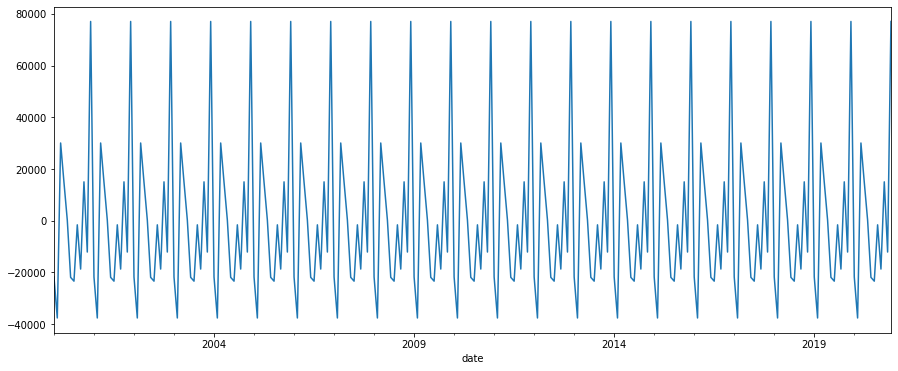

In [74]:
sp_gasolina_decomp = seasonal_decompose(base_gasolina_sp)
sp_gasolina_saz = sp_gasolina_decomp.seasonal
sp_gasolina_saz.plot(figsize=(15,6))

### Tocantins

In [75]:
base_gasolina_to = base_gasolina_pivot[["to"]]
base_gasolina_to

regiao             to
date                 
2000-01-01   6961.518
2000-02-01   7027.916
2000-03-01   6616.280
2000-04-01   6699.691
2000-05-01   7174.920
...               ...
2020-08-01  28500.950
2020-09-01  30233.690
2020-10-01  32556.270
2020-11-01  31717.360
2020-12-01  36449.880

[252 rows x 1 columns]

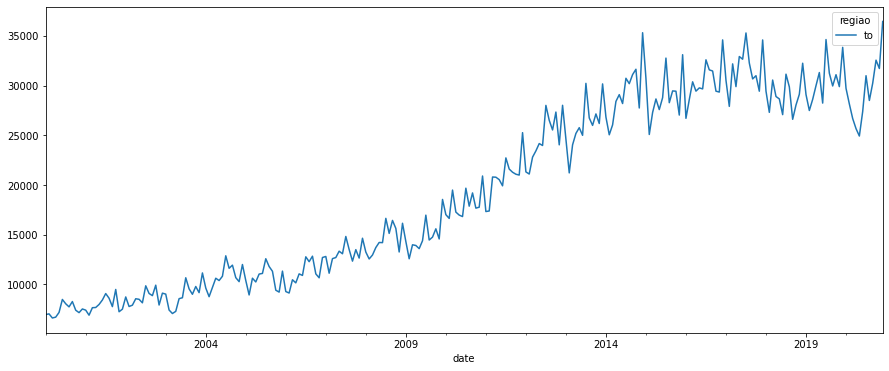

In [76]:
base_gasolina_to.plot(figsize=(15,6))

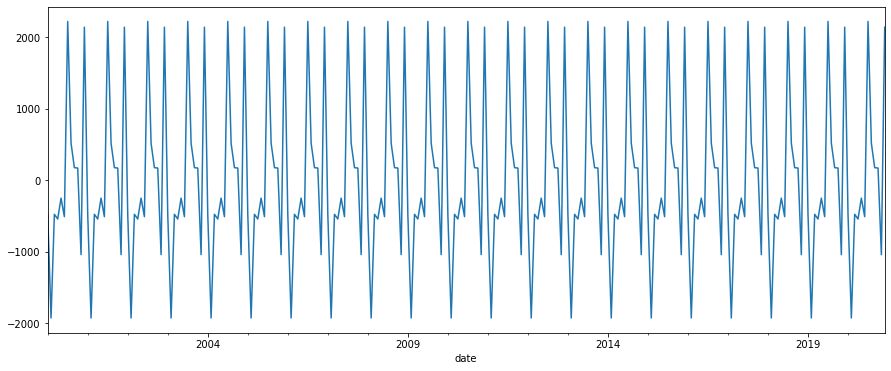

In [77]:
to_gasolina_decomp = seasonal_decompose(base_gasolina_to)
to_gasolina_saz = to_gasolina_decomp.seasonal
to_gasolina_saz.plot(figsize=(15,6))

## Análise da sazonalidade nos estados

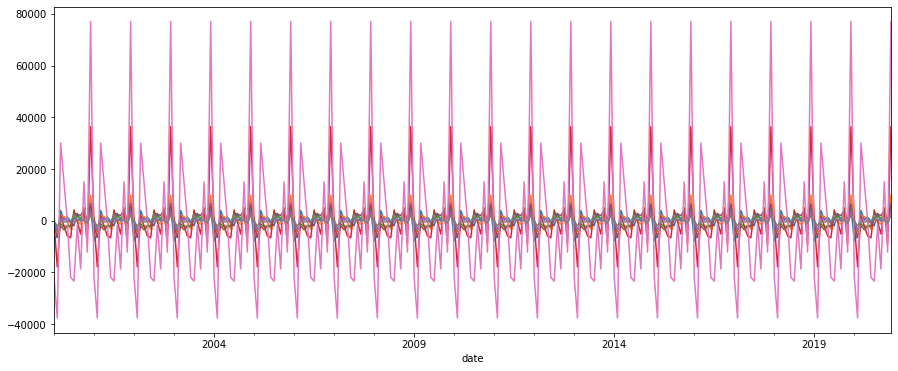

In [78]:
df_gasolina_saz.plot(figsize=(15,6))
go_gasolina_saz.plot(figsize=(15,6))
ma_gasolina_saz.plot(figsize=(15,6))
mg_gasolina_saz.plot(figsize=(15,6))
mt_gasolina_saz.plot(figsize=(15,6))
pa_gasolina_saz.plot(figsize=(15,6))
sp_gasolina_saz.plot(figsize=(15,6))
to_gasolina_saz.plot(figsize=(15,6))

## Distribuição do consumo por estado

In [79]:
# Tratando base para obter o consumo do último mês de 2020 distribuído por estados

base_gasolina_dist = base_gasolina_tratada.pivot(index="regiao", columns="date",values="value").reset_index()

base_gasolina_dist = base_gasolina_dist[["regiao", datetime(2020, 12, 1, 0, 0, 0)]]
base_gasolina_dist = base_gasolina_dist.rename(columns={datetime(2020, 12, 1, 0, 0, 0): "values"})

base_gasolina_dist = base_gasolina_dist[base_gasolina_dist["regiao"].apply(lambda x: "br" not in x)]

base_gasolina_dist

date regiao      values
1        df   95159.739
2        go  118610.930
3        ma   96173.890
4        mg  333219.017
5        mt   54540.978
6        pa  125267.662
7        sp  760385.479
8        to   36449.880

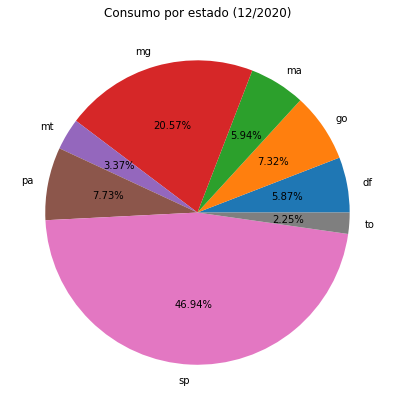

In [151]:
labels_dist_gasolina = base_gasolina_dist['regiao'].tolist()
data_dist_gasolina = base_gasolina_dist['values'].astype(int).tolist()

fig_g, ax_g = plt.subplots(figsize=(10,7))

ax_g.pie(data_dist_gasolina, labels = labels_dist_gasolina, autopct='%.2f%%')
ax_g.set_title('Consumo por estado (12/2020)', fontsize=12)
plt.show()

## Tamanho do mercado e sua evolução nos últimos 5 anos

In [81]:
base_gasolina_br

regiao               br
date                   
2000-01-01  1810572.096
2000-02-01  1966364.759
2000-03-01  1801197.989
2000-04-01  1863561.899
2000-05-01  1869175.737
...                 ...
2020-08-01  2933072.544
2020-09-01  3127219.046
2020-10-01  3390764.563
2020-11-01  3217673.158
2020-12-01  3716766.189

[252 rows x 1 columns]

In [82]:
# Identificando últimos 5 anos (2016 a 2020)

br_ult_cinco_g = base_gasolina_br.iloc[(252-(5*12)):252,]
br_ult_cinco_g

regiao               br
date                   
2016-01-01  3321867.971
2016-02-01  3463858.387
2016-03-01  3732665.258
2016-04-01  3571395.664
2016-05-01  3428700.680
2016-06-01  3370928.205
2016-07-01  3442005.562
2016-08-01  3553375.614
2016-09-01  3583991.917
2016-10-01  3620869.402
2016-11-01  3706914.296
2016-12-01  4222508.922
2017-01-01  3722536.768
2017-02-01  3546965.904
2017-03-01  3948915.967
2017-04-01  3650211.705
2017-05-01  3784613.178
2017-06-01  3761325.411
2017-07-01  3709278.449
2017-08-01  3695580.263
2017-09-01  3500534.965
2017-10-01  3538792.814
2017-11-01  3434291.149
2017-12-01  3856485.440
2018-01-01  3389921.849
2018-02-01  3132420.400
2018-03-01  3625937.313
2018-04-01  3374562.564
2018-05-01  3067245.438
2018-06-01  3152100.196
2018-07-01  2996048.735
2018-08-01  3197553.423
2018-09-01  2887525.073
2018-10-01  3053220.141
2018-11-01  3018897.469
2018-12-01  3456346.661
2019-01-01  3126943.258
2019-02-01  2956866.405
2019-03-01  3112212.519
2019-04-01  3195715.177
2019-05-01  3139780.247
2019-06-01  2955523.366
2019-07-01  3226324.925
2019-08-01  3257545.299
2019-09-01  3088984.445
2019-10-01  3322277.250
2019-11-01  3219828.551
2019-12-01  3563035.328
2020-01-01  3167239.587
2020-02-01  3083980.787
2020-03-01  2697024.613
2020-04-01  2286484.697
2020-05-01  2499361.956
2020-06-01  2722475.037
2020-07-01  2981551.989
2020-08-01  2933072.544
2020-09-01  3127219.046
2020-10-01  3390764.563
2020-11-01  3217673.158
2020-12-01  3716766.189

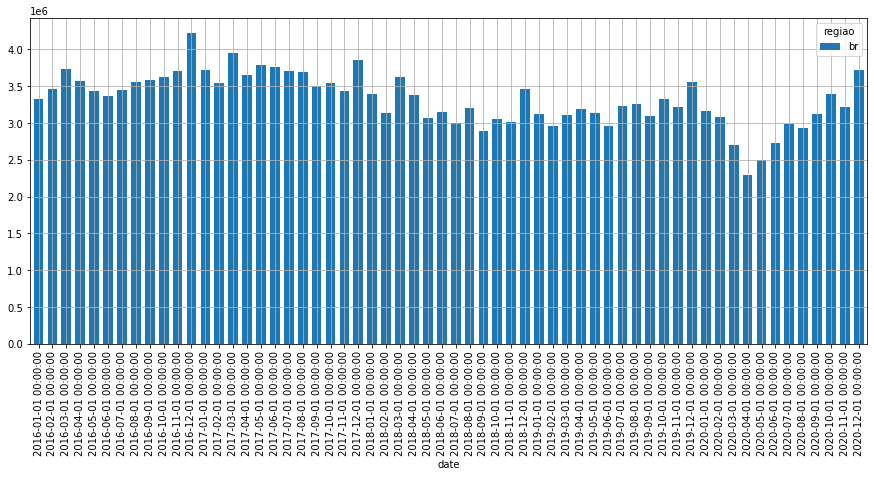

In [83]:
br_ult_cinco_g.plot.bar(width=0.7, grid=True, figsize=(15, 6))

# Etanol

## Importação e verificação dos dados

In [84]:
base_etanol = pd.read_excel("/content/drive/MyDrive/dados_desafiodatascientistintern_vendas_distribuidoras_anp.xlsx", sheet_name="etanol")
base_etanol

regiao  meses        2000        2001        2002        2003        2004  \
0       df      1   11687.930    9752.261    8612.889    8073.394    5808.022   
1       df      2   13407.993    9234.716    7876.697    6767.353    5493.589   
2       df      3   13389.184   10570.868    9191.149    6872.023    6806.102   
3       df      4   12680.955   10143.583    9056.833    7143.382    7997.469   
4       df      5   13046.814   10514.641    9425.382    7730.848    6225.922   
..     ...    ...         ...         ...         ...         ...         ...   
103     br      8  348159.819  284236.559  336652.888  248127.393  347227.818   
104     br      9  340731.401  262666.627  378499.189  251868.486  375857.890   
105     br     10  343127.228  293394.956  390388.562  299343.175  388804.558   
106     br     11  337874.550  275323.900  286504.207  281154.236  374273.554   
107     br     12  351129.370  304030.617  323800.423  400265.100  432988.103   

           2005        2006          2007  ...           2011        2012  \
0      4735.634    6549.214  6.703746e+03  ...    8659.142372    4414.000   
1      5055.400    6087.154  6.618272e+03  ...    6663.186863    5068.000   
2      6775.441    5345.894  9.042244e+03  ...    6095.000000    6319.000   
3      6140.480    5014.809  6.366995e+03  ...    3041.064659    4674.765   
4      5562.687    5887.520  7.442277e+03  ...    8038.000000    4900.000   
..          ...         ...           ...  ...            ...         ...   
103  407608.884  537207.301  8.361873e+05  ...  989564.005000  821321.799   
104  445284.490  566178.374  8.192404e+05  ...  839775.981000  815790.523   
105  408760.714  568982.902  9.921440e+05  ...  873127.570000  918801.757   
106  427192.612  584201.058  9.781652e+05  ...  818507.051000  898237.510   
107  512537.208  672484.172  1.040980e+06  ...  856756.146000  892364.129   

            2013          2014         2015         2016         2017  \
0       4234.000  6.546840e+03     6929.000     5045.000     1814.800   
1       7106.000  6.704767e+03    10463.000     3828.000     1573.551   
2       7205.000  5.850457e+03    11875.179     3453.050     1662.800   
3       6924.000  5.643000e+03    10105.501     2999.400     1437.802   
4       6390.203  5.581000e+03     9595.800     3927.042     1777.800   
..           ...           ...          ...          ...          ...   
103  1020674.311  1.061067e+06  1576056.088  1351409.336  1220999.018   
104  1016543.934  1.100117e+06  1633094.971  1344811.377  1311907.332   
105  1126514.632  1.208197e+06  1750110.083  1198896.555  1377058.135   
106  1104386.966  1.165671e+06  1409931.554  1005537.458  1338011.872   
107  1210650.175  1.379560e+06  1546732.953  1144133.271  1497821.338   

            2018         2019         2020  
0       4056.589     8890.000    11872.630  
1       4784.596    11407.411     9765.500  
2       4041.537    11340.581     6591.000  
3       4434.645    14403.438     3658.000  
4       6705.091    16871.685     5841.039  
..           ...          ...          ...  
103  1822817.146  1868818.202  1569803.325  
104  1799251.015  1873379.561  1700749.710  
105  2062893.023  2055840.704  1871664.946  
106  1945479.785  1981879.465  1704279.537  
107  2055197.685  2137636.332  1936374.559  

[108 rows x 23 columns]

In [85]:
base_etanol.dtypes

regiao     object
meses       int64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object

In [86]:
base_etanol.isnull().sum()

regiao    0
meses     0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
dtype: int64

In [87]:
base_etanol.describe()

meses           2000           2001           2002           2003  \
count  108.000000     108.000000     108.000000     108.000000     108.000000   
mean     6.500000   69786.495870   52519.812083   58584.272444   49593.219852   
std      3.468146  122264.975983   92368.225582  102457.466056   88384.800862   
min      1.000000     973.149000     701.701000     576.026000     456.992000   
25%      3.750000    2220.817500    1187.510000    1007.805750    1023.946250   
50%      6.500000   12328.239500    9788.222500    9292.338000    7281.205500   
75%      9.250000   48711.561250   35399.012750   37247.142250   31913.093750   
max     12.000000  435214.558000  321257.555000  390388.562000  400265.100000   

                2004           2005           2006          2007  \
count     108.000000     108.000000     108.000000  1.080000e+02   
mean    70349.805574   72157.874454   99395.071417  1.509818e+05   
std    124026.857842  129263.890641  178040.811549  2.696106e+05   
min       587.219000     654.950000     669.350000  8.135874e+02   
25%      1046.675000    1152.733250    1357.015000  3.716048e+03   
50%      6219.905500    6889.085000    7128.445000  1.405890e+04   
75%     36268.955250   34515.837000   34025.114750  5.860220e+04   
max    432988.103000  512537.208000  672484.172000  1.040980e+06   

               2008  ...          2011           2012          2013  \
count  1.080000e+02  ...  1.080000e+02     108.000000  1.080000e+02   
mean   2.106986e+05  ...  1.777062e+05  161202.802743  1.912303e+05   
std    3.696916e+05  ...  3.134937e+05  277542.256488  3.290128e+05   
min    2.001311e+03  ...  1.278892e+03    1613.000000  1.618000e+03   
25%    7.260727e+03  ...  3.352246e+03    2533.425000  2.993113e+03   
50%    2.257453e+04  ...  2.711338e+04   32516.441000  4.000520e+04   
75%    8.396833e+04  ...  6.891892e+04   61925.730862  7.895171e+04   
max    1.370131e+06  ...  1.163947e+06  918801.757000  1.210650e+06   

               2014          2015          2016          2017          2018  \
count  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02  1.080000e+02   
mean   2.124626e+05  2.900745e+05  2.425379e+05  2.278328e+05  3.192563e+05   
std    3.661304e+05  4.897482e+05  4.063929e+05  3.830118e+05  5.349007e+05   
min    2.405760e+03  3.297046e+03  1.665530e+03  8.319500e+02  1.645272e+03   
25%    3.432755e+03  4.874850e+03  3.023150e+03  1.955238e+03  4.052826e+03   
50%    4.180033e+04  5.797374e+04  4.952319e+04  5.352440e+04  6.989804e+04   
75%    8.406783e+04  1.852431e+05  1.471239e+05  1.630822e+05  2.464492e+05   
max    1.379560e+06  1.750110e+06  1.351409e+06  1.497821e+06  2.062893e+06   

               2019          2020  
count  1.080000e+02  1.080000e+02  
mean   3.747975e+05  3.230179e+05  
std    6.110411e+05  5.291368e+05  
min    2.266307e+03  1.729560e+03  
25%    4.706522e+03  4.006539e+03  
50%    8.292587e+04  7.706839e+04  
75%    2.807823e+05  2.513468e+05  
max    2.137636e+06  1.936375e+06  

[8 rows x 22 columns]

## Tratamento dos dados

In [88]:
# Renomeação de colunas (int -> str)
dicio = {}

for i in range(2000, 2021):
    dicio[i] = str(i)

base_etanol = base_etanol.rename(columns=dicio)

dicio

{2000: '2000',
 2001: '2001',
 2002: '2002',
 2003: '2003',
 2004: '2004',
 2005: '2005',
 2006: '2006',
 2007: '2007',
 2008: '2008',
 2009: '2009',
 2010: '2010',
 2011: '2011',
 2012: '2012',
 2013: '2013',
 2014: '2014',
 2015: '2015',
 2016: '2016',
 2017: '2017',
 2018: '2018',
 2019: '2019',
 2020: '2020'}

In [89]:
# Concluindo tratamento e adicionando data

base_etanol_tratada = pd.melt(base_etanol, id_vars=['meses', 'regiao'], value_vars=[str(i) for i in range(2000,2021)])
base_etanol_tratada['date'] = base_etanol_tratada['variable'].astype(str) + '-' + base_etanol_tratada["meses"].astype(str) + '-01'
base_etanol_tratada.date = pd.to_datetime(base_etanol_tratada.date)
base_etanol_tratada

meses regiao variable        value       date
0         1     df     2000    11687.930 2000-01-01
1         2     df     2000    13407.993 2000-02-01
2         3     df     2000    13389.184 2000-03-01
3         4     df     2000    12680.955 2000-04-01
4         5     df     2000    13046.814 2000-05-01
...     ...    ...      ...          ...        ...
2263      8     br     2020  1569803.325 2020-08-01
2264      9     br     2020  1700749.710 2020-09-01
2265     10     br     2020  1871664.946 2020-10-01
2266     11     br     2020  1704279.537 2020-11-01
2267     12     br     2020  1936374.559 2020-12-01

[2268 rows x 5 columns]

In [90]:
# Pivotando tabela e colocando em ordem

base_etanol_pivot = base_etanol_tratada.pivot(index="date", columns="regiao",values="value")
base_etanol_pivot = base_etanol_pivot.sort_values("date")
base_etanol_pivot

regiao               br         df          go        ma          mg  \
date                                                                   
2000-01-01   425187.481  11687.930   16683.495  1596.190   47585.405   
2000-02-01   421706.408  13407.993   16256.111  1372.687   52736.964   
2000-03-01   405266.215  13389.184   15730.311  1136.300   48458.064   
2000-04-01   414609.690  12680.955   16199.232  1226.280   46727.057   
2000-05-01   435214.558  13046.814   16347.342  1306.038   53942.803   
...                 ...        ...         ...       ...         ...   
2020-08-01  1569803.325  13177.000  128344.479  3441.830  224457.784   
2020-09-01  1700749.710  14377.400  141479.262  3884.120  245895.402   
2020-10-01  1871664.946  21061.600  160559.568  3747.860  270740.002   
2020-11-01  1704279.537  27471.880  142270.068  3304.860  246950.272   
2020-12-01  1936374.559  14527.000  163024.456  4546.430  281697.706   

regiao             mt        pa          sp        to  
date                                                   
2000-01-01   5863.245  2224.090  187685.086  1374.650  
2000-02-01   6016.752  2430.905  180933.963  1199.800  
2000-03-01   6458.027  2230.335  170812.414  1278.050  
2000-04-01   5428.650  2803.718  181197.846  1323.160  
2000-05-01   7823.770  2810.640  189448.260  1376.554  
...               ...       ...         ...       ...  
2020-08-01  75509.869  4157.846  828866.705  3286.530  
2020-09-01  81677.883  4047.346  885846.549  3831.100  
2020-10-01  90453.228  4341.118  967739.247  4073.660  
2020-11-01  80698.543  3719.248  881617.663  3487.830  
2020-12-01  89785.598  4533.764  995166.123  4449.560  

[252 rows x 9 columns]

## Série temporal do consumo das regiões

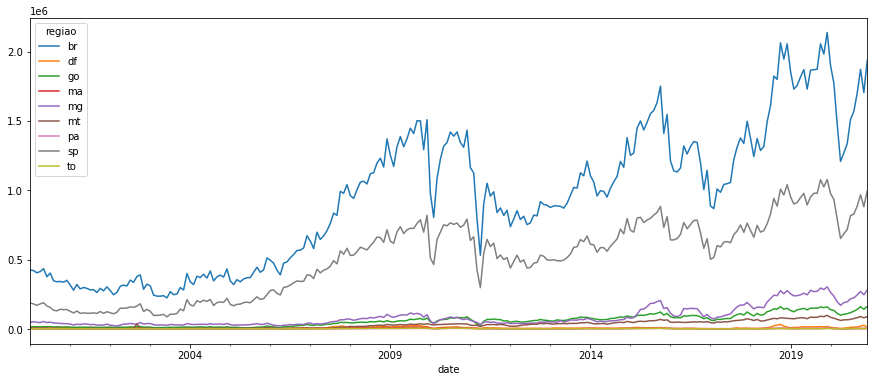

In [91]:
base_etanol_pivot.plot(figsize=(15,6))

## Decomposição dos dados por região

### Brasil

In [92]:
base_etanol_br = base_etanol_pivot[["br"]]
base_etanol_br

regiao               br
date                   
2000-01-01   425187.481
2000-02-01   421706.408
2000-03-01   405266.215
2000-04-01   414609.690
2000-05-01   435214.558
...                 ...
2020-08-01  1569803.325
2020-09-01  1700749.710
2020-10-01  1871664.946
2020-11-01  1704279.537
2020-12-01  1936374.559

[252 rows x 1 columns]

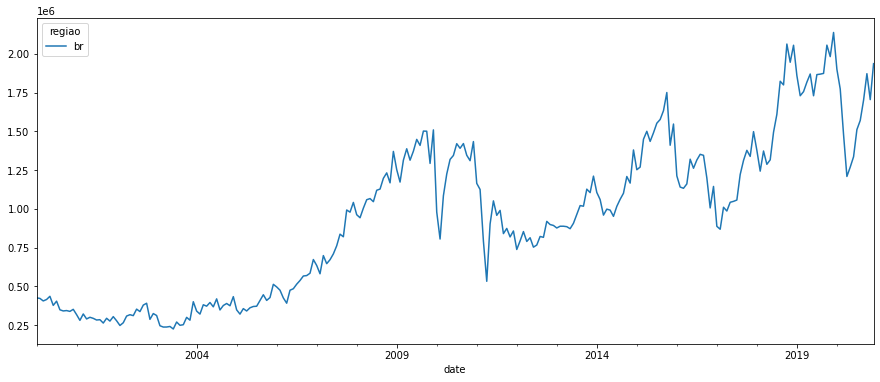

In [93]:
base_etanol_br.plot(figsize=(15,6))

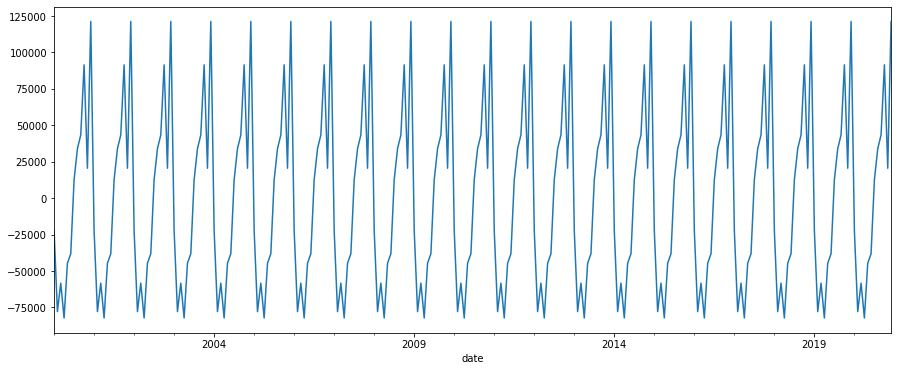

In [94]:
br_etanol_decomp = seasonal_decompose(base_etanol_br)
br_etanol_saz = br_etanol_decomp.seasonal
br_etanol_saz.plot(figsize=(15,6))

### Distrito Federal

In [95]:
base_etanol_df = base_etanol_pivot[["df"]]
base_etanol_df

regiao             df
date                 
2000-01-01  11687.930
2000-02-01  13407.993
2000-03-01  13389.184
2000-04-01  12680.955
2000-05-01  13046.814
...               ...
2020-08-01  13177.000
2020-09-01  14377.400
2020-10-01  21061.600
2020-11-01  27471.880
2020-12-01  14527.000

[252 rows x 1 columns]

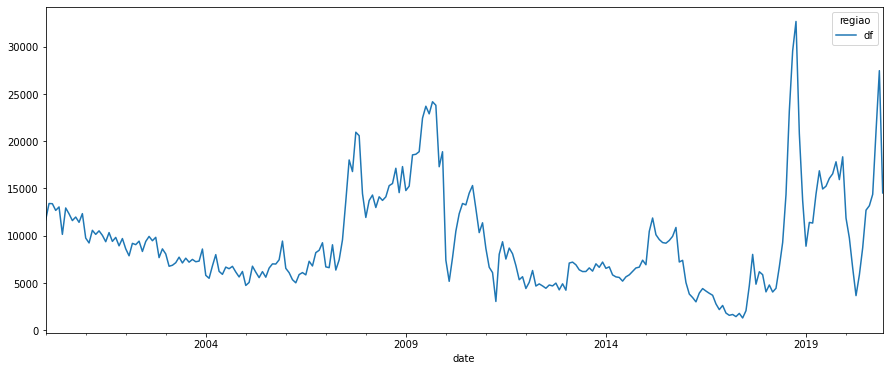

In [96]:
base_etanol_df.plot(figsize=(15,6))

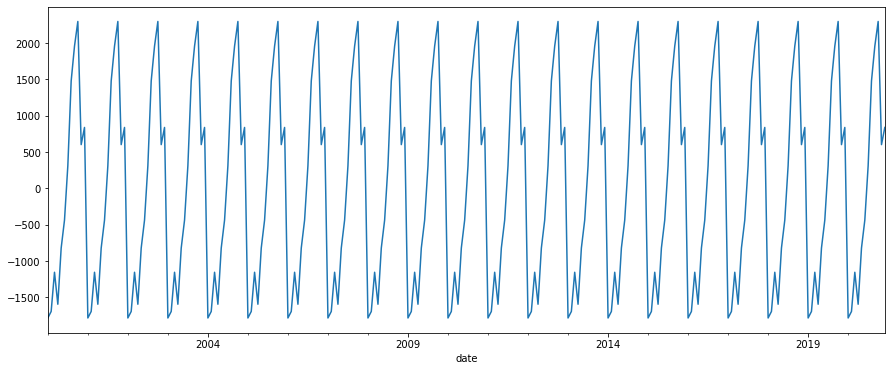

In [97]:
df_etanol_decomp = seasonal_decompose(base_etanol_df)
df_etanol_saz = df_etanol_decomp.seasonal
df_etanol_saz.plot(figsize=(15,6))

### Goiás

In [98]:
base_etanol_go = base_etanol_pivot[["go"]]
base_etanol_go

regiao              go
date                  
2000-01-01   16683.495
2000-02-01   16256.111
2000-03-01   15730.311
2000-04-01   16199.232
2000-05-01   16347.342
...                ...
2020-08-01  128344.479
2020-09-01  141479.262
2020-10-01  160559.568
2020-11-01  142270.068
2020-12-01  163024.456

[252 rows x 1 columns]

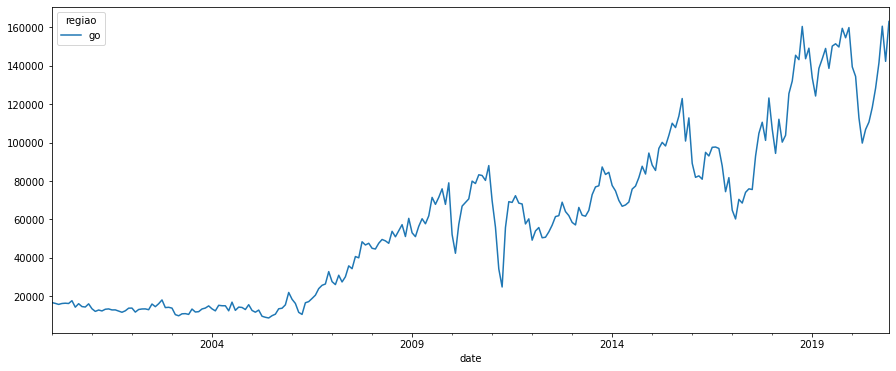

In [99]:
base_etanol_go.plot(figsize=(15,6))

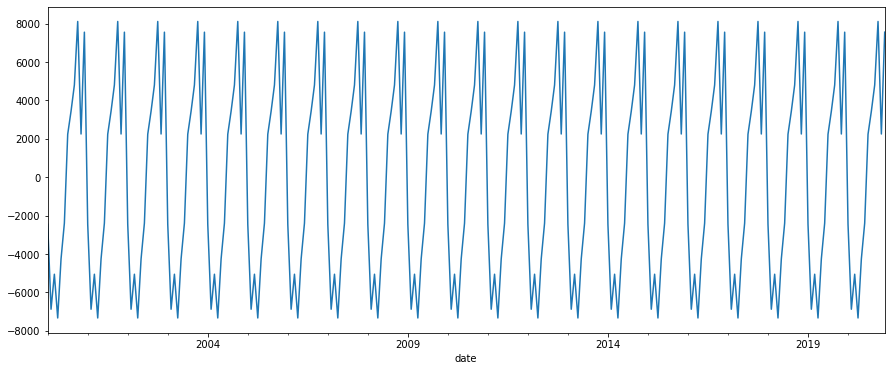

In [100]:
go_etanol_decomp = seasonal_decompose(base_etanol_go)
go_etanol_saz = go_etanol_decomp.seasonal
go_etanol_saz.plot(figsize=(15,6))

### Maranhão

In [101]:
base_etanol_ma = base_etanol_pivot[["ma"]]
base_etanol_ma

regiao            ma
date                
2000-01-01  1596.190
2000-02-01  1372.687
2000-03-01  1136.300
2000-04-01  1226.280
2000-05-01  1306.038
...              ...
2020-08-01  3441.830
2020-09-01  3884.120
2020-10-01  3747.860
2020-11-01  3304.860
2020-12-01  4546.430

[252 rows x 1 columns]

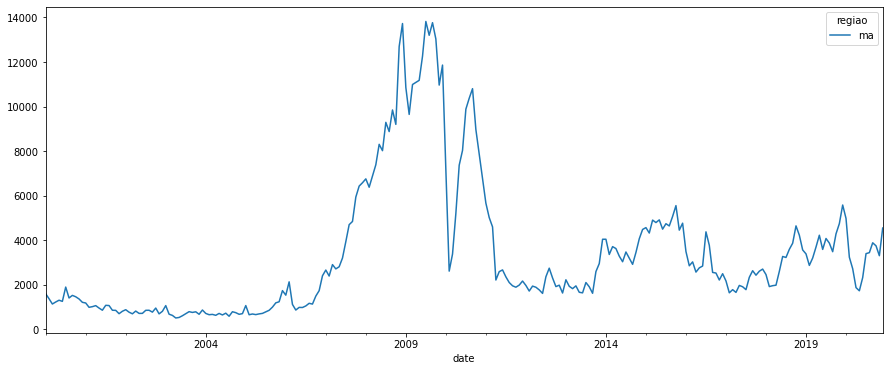

In [102]:
base_etanol_ma.plot(figsize=(15,6))

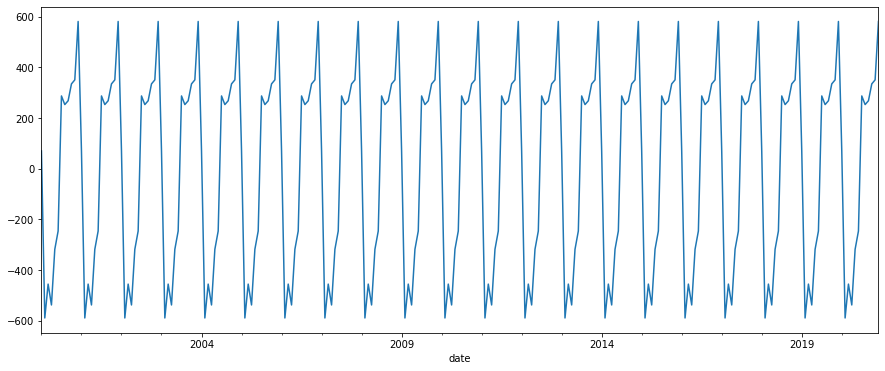

In [103]:
ma_etanol_decomp = seasonal_decompose(base_etanol_ma)
ma_etanol_saz = ma_etanol_decomp.seasonal
ma_etanol_saz.plot(figsize=(15,6))

### Minas Gerais

In [104]:
base_etanol_mg = base_etanol_pivot[["mg"]]
base_etanol_mg

regiao              mg
date                  
2000-01-01   47585.405
2000-02-01   52736.964
2000-03-01   48458.064
2000-04-01   46727.057
2000-05-01   53942.803
...                ...
2020-08-01  224457.784
2020-09-01  245895.402
2020-10-01  270740.002
2020-11-01  246950.272
2020-12-01  281697.706

[252 rows x 1 columns]

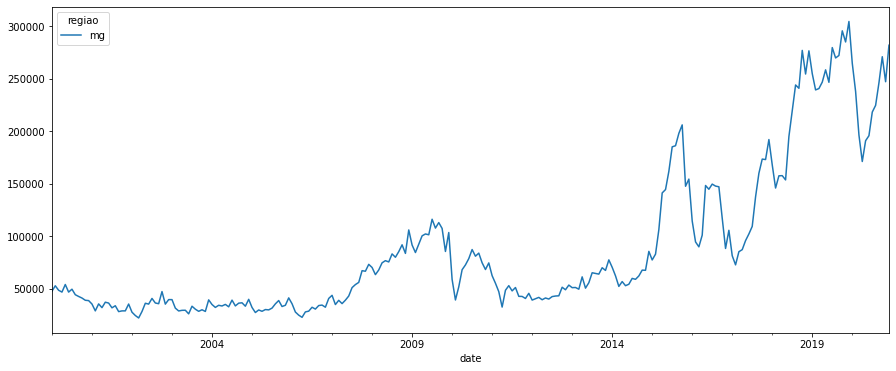

In [105]:
base_etanol_mg.plot(figsize=(15,6))

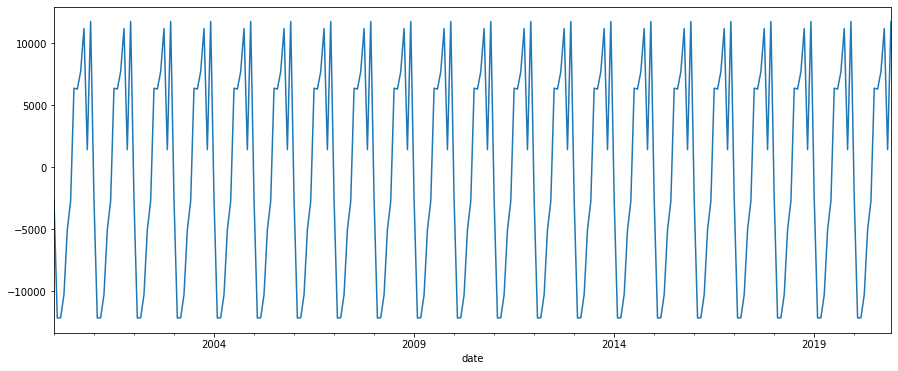

In [106]:
mg_etanol_decomp = seasonal_decompose(base_etanol_mg)
mg_etanol_saz = mg_etanol_decomp.seasonal
mg_etanol_saz.plot(figsize=(15,6))

### Mato Grosso

In [107]:
base_etanol_mt = base_etanol_pivot[["mt"]]
base_etanol_mt

regiao             mt
date                 
2000-01-01   5863.245
2000-02-01   6016.752
2000-03-01   6458.027
2000-04-01   5428.650
2000-05-01   7823.770
...               ...
2020-08-01  75509.869
2020-09-01  81677.883
2020-10-01  90453.228
2020-11-01  80698.543
2020-12-01  89785.598

[252 rows x 1 columns]

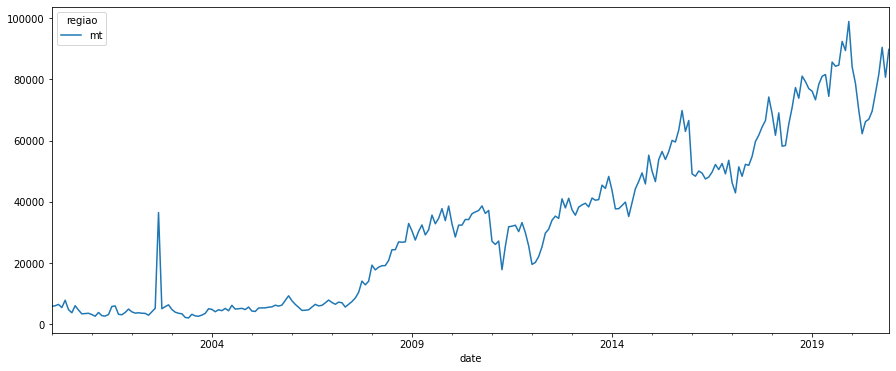

In [108]:
base_etanol_mt.plot(figsize=(15,6))

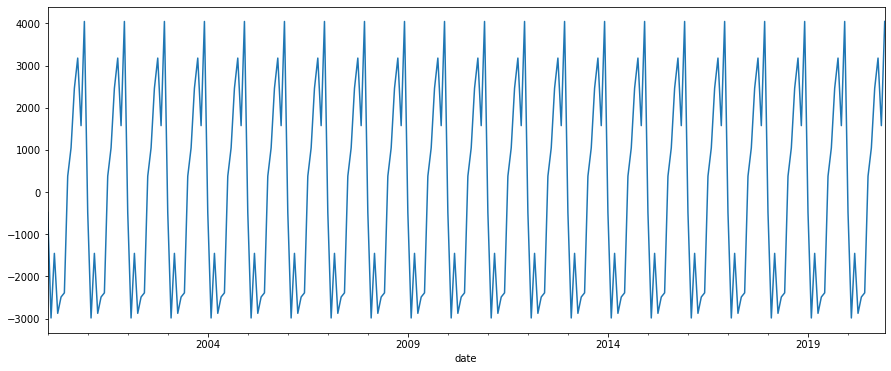

In [109]:
mt_etanol_decomp = seasonal_decompose(base_etanol_mt)
mt_etanol_saz = mt_etanol_decomp.seasonal
mt_etanol_saz.plot(figsize=(15,6))

### Pará

In [110]:
base_etanol_pa = base_etanol_pivot[["pa"]]
base_etanol_pa

regiao            pa
date                
2000-01-01  2224.090
2000-02-01  2430.905
2000-03-01  2230.335
2000-04-01  2803.718
2000-05-01  2810.640
...              ...
2020-08-01  4157.846
2020-09-01  4047.346
2020-10-01  4341.118
2020-11-01  3719.248
2020-12-01  4533.764

[252 rows x 1 columns]

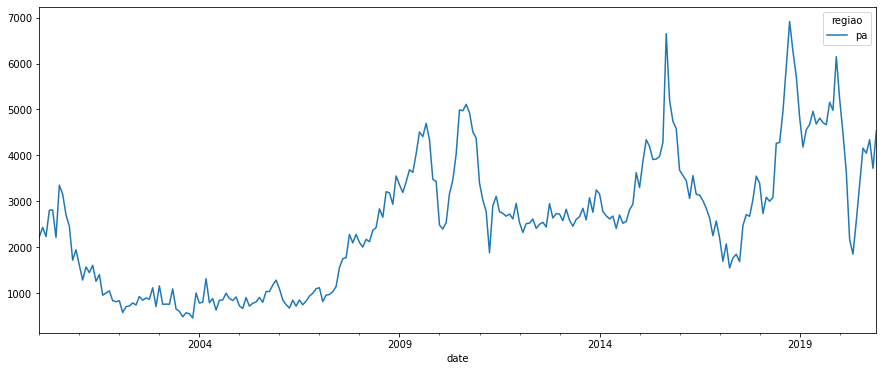

In [111]:
base_etanol_pa.plot(figsize=(15,6))

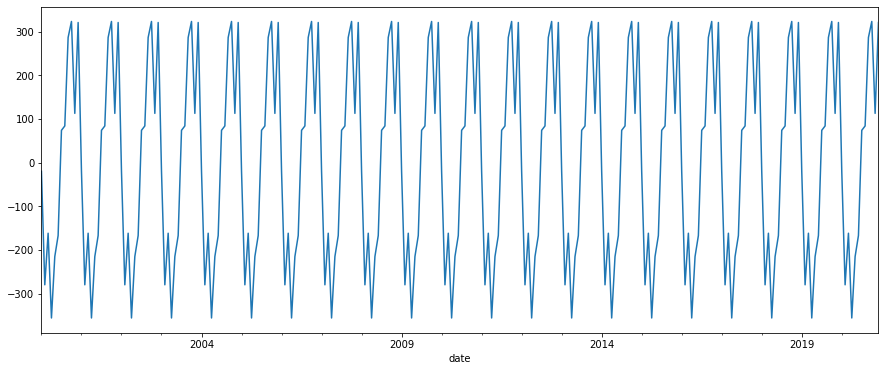

In [112]:
pa_etanol_decomp = seasonal_decompose(base_etanol_pa)
pa_etanol_saz = pa_etanol_decomp.seasonal
pa_etanol_saz.plot(figsize=(15,6))

### São Paulo

In [113]:
base_etanol_sp = base_etanol_pivot[["sp"]]
base_etanol_sp

regiao              sp
date                  
2000-01-01  187685.086
2000-02-01  180933.963
2000-03-01  170812.414
2000-04-01  181197.846
2000-05-01  189448.260
...                ...
2020-08-01  828866.705
2020-09-01  885846.549
2020-10-01  967739.247
2020-11-01  881617.663
2020-12-01  995166.123

[252 rows x 1 columns]

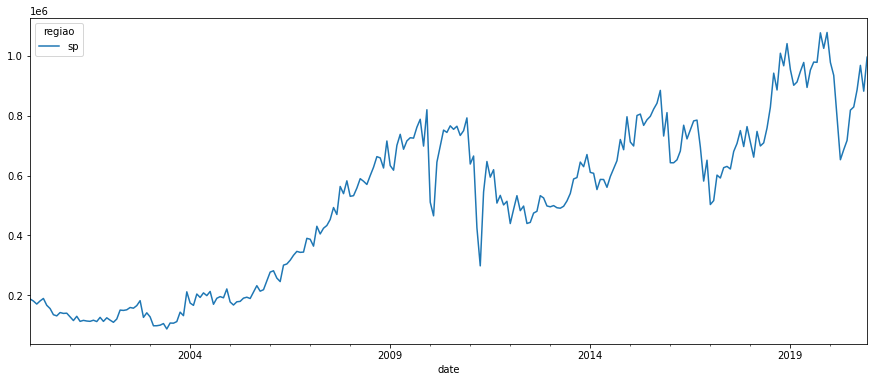

In [114]:
base_etanol_sp.plot(figsize=(15,6))

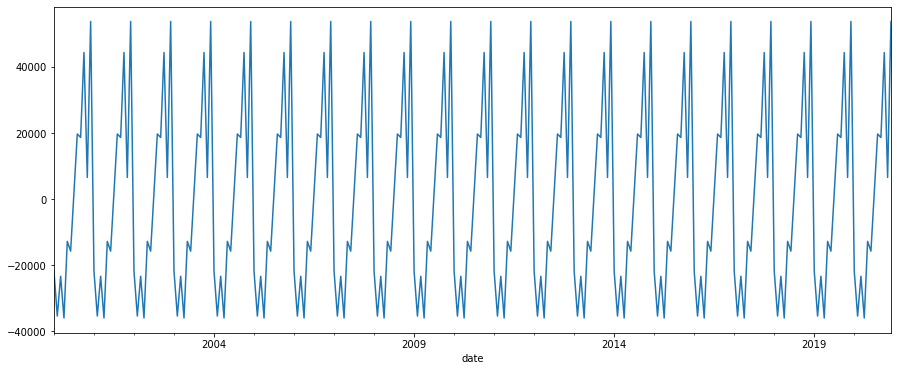

In [115]:
sp_etanol_decomp = seasonal_decompose(base_etanol_sp)
sp_etanol_saz = sp_etanol_decomp.seasonal
sp_etanol_saz.plot(figsize=(15,6))

### Tocantins

In [116]:
base_etanol_to = base_etanol_pivot[["to"]]
base_etanol_to

regiao            to
date                
2000-01-01  1374.650
2000-02-01  1199.800
2000-03-01  1278.050
2000-04-01  1323.160
2000-05-01  1376.554
...              ...
2020-08-01  3286.530
2020-09-01  3831.100
2020-10-01  4073.660
2020-11-01  3487.830
2020-12-01  4449.560

[252 rows x 1 columns]

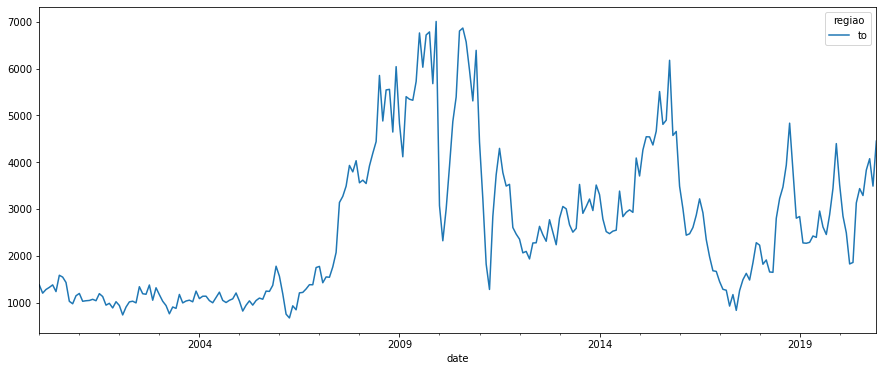

In [117]:
base_etanol_to.plot(figsize=(15,6))

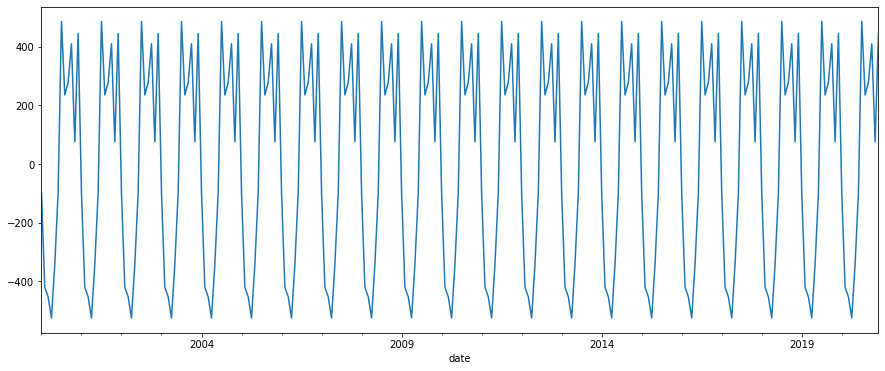

In [118]:
to_etanol_decomp = seasonal_decompose(base_etanol_to)
to_etanol_saz = to_etanol_decomp.seasonal
to_etanol_saz.plot(figsize=(15,6))

## Análise da sazonalidade nos estados

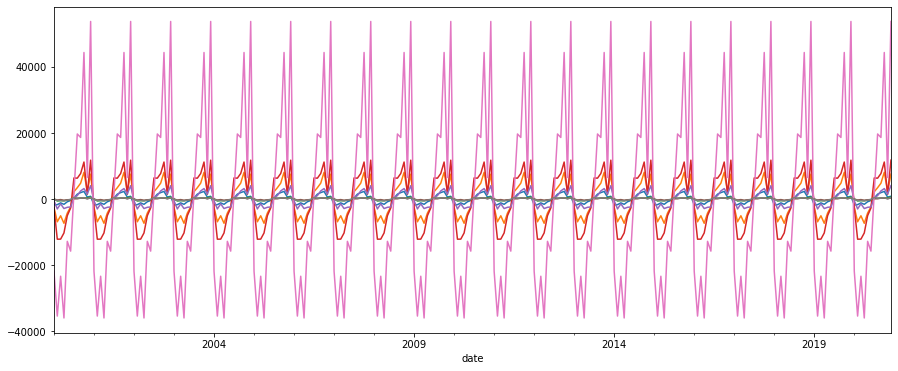

In [119]:
df_etanol_saz.plot(figsize=(15,6))
go_etanol_saz.plot(figsize=(15,6))
ma_etanol_saz.plot(figsize=(15,6))
mg_etanol_saz.plot(figsize=(15,6))
mt_etanol_saz.plot(figsize=(15,6))
pa_etanol_saz.plot(figsize=(15,6))
sp_etanol_saz.plot(figsize=(15,6))
to_etanol_saz.plot(figsize=(15,6))

## Distribuição do consumo por estado

In [120]:
# Tratando base para obter o consumo do último mês de 2020 distribuído por estados

base_etanol_dist = base_etanol_tratada.pivot(index="regiao", columns="date",values="value").reset_index()

base_etanol_dist = base_etanol_dist[["regiao", datetime(2020, 12, 1, 0, 0, 0)]]
base_etanol_dist = base_etanol_dist.rename(columns={datetime(2020, 12, 1, 0, 0, 0): "values"})

base_etanol_dist = base_etanol_dist[base_etanol_dist["regiao"].apply(lambda x: "br" not in x)]

base_etanol_dist

date regiao      values
1        df   14527.000
2        go  163024.456
3        ma    4546.430
4        mg  281697.706
5        mt   89785.598
6        pa    4533.764
7        sp  995166.123
8        to    4449.560

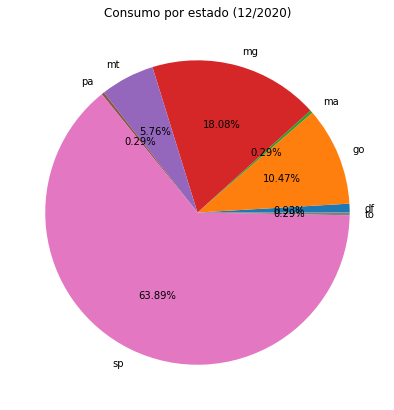

In [150]:
labels_dist_etanol = base_etanol_dist['regiao'].tolist()
data_dist_etanol = base_etanol_dist['values'].astype(int).tolist()

fig_e, ax_e = plt.subplots(figsize=(10,7))

ax_e.pie(data_dist_etanol, labels = labels_dist_etanol, autopct='%.2f%%')
ax_e.set_title('Consumo por estado (12/2020)', fontsize=12)
plt.show()

## Tamanho do mercado e sua evolução nos últimos 5 anos

In [122]:
base_etanol_br

regiao               br
date                   
2000-01-01   425187.481
2000-02-01   421706.408
2000-03-01   405266.215
2000-04-01   414609.690
2000-05-01   435214.558
...                 ...
2020-08-01  1569803.325
2020-09-01  1700749.710
2020-10-01  1871664.946
2020-11-01  1704279.537
2020-12-01  1936374.559

[252 rows x 1 columns]

In [123]:
# Identificando últimos 5 anos (2016 a 2020)

br_ult_cinco_e = base_etanol_br.iloc[(252-(5*12)):252,]
br_ult_cinco_e

regiao               br
date                   
2016-01-01  1212363.102
2016-02-01  1140129.339
2016-03-01  1132195.007
2016-04-01  1160337.006
2016-05-01  1319907.233
2016-06-01  1261522.510
2016-07-01  1314601.982
2016-08-01  1351409.336
2016-09-01  1344811.377
2016-10-01  1198896.555
2016-11-01  1005537.458
2016-12-01  1144133.271
2017-01-01   886757.919
2017-02-01   867881.941
2017-03-01  1009815.798
2017-04-01   985482.535
2017-05-01  1041871.188
2017-06-01  1047822.916
2017-07-01  1056344.319
2017-08-01  1220999.018
2017-09-01  1311907.332
2017-10-01  1377058.135
2017-11-01  1338011.872
2017-12-01  1497821.338
2018-01-01  1377296.221
2018-02-01  1242878.696
2018-03-01  1372784.096
2018-04-01  1286890.469
2018-05-01  1315822.230
2018-06-01  1494048.567
2018-07-01  1609360.240
2018-08-01  1822817.146
2018-09-01  1799251.015
2018-10-01  2062893.023
2018-11-01  1945479.785
2018-12-01  2055197.685
2019-01-01  1859509.630
2019-02-01  1729379.876
2019-03-01  1755817.128
2019-04-01  1817073.487
2019-05-01  1869673.669
2019-06-01  1729295.153
2019-07-01  1865746.888
2019-08-01  1868818.202
2019-09-01  1873379.561
2019-10-01  2055840.704
2019-11-01  1981879.465
2019-12-01  2137636.332
2020-01-01  1900091.831
2020-02-01  1772916.871
2020-03-01  1478098.604
2020-04-01  1208503.181
2020-05-01  1268952.570
2020-06-01  1335636.449
2020-07-01  1510860.930
2020-08-01  1569803.325
2020-09-01  1700749.710
2020-10-01  1871664.946
2020-11-01  1704279.537
2020-12-01  1936374.559

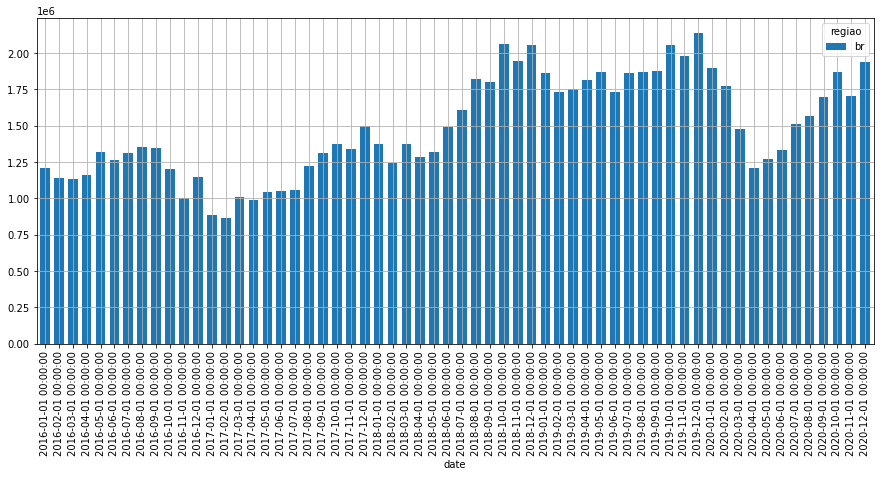

In [124]:
br_ult_cinco_e.plot.bar(width=0.7, grid=True, figsize=(15, 6))

# Outras análises

## Gráfico 1: Consumos por estado

In [125]:
# Tratando base para obter o consumo, do último mês de 2019, distribuído por estados (Diesel)
nova_base_dist = base_tratada.pivot(index="regiao", columns="date",values="value").reset_index()

nova_base_dist = nova_base_dist[["regiao", datetime(2019, 12, 1, 0, 0, 0)]]
nova_base_dist = nova_base_dist.rename(columns={datetime(2019, 12, 1, 0, 0, 0): "values"})

nova_base_dist = nova_base_dist[nova_base_dist["regiao"].apply(lambda x: "br" not in x)]

nova_base_dist

date regiao      values
1        df   31888.359
2        go  182607.986
3        ma  118148.638
4        mg  518746.368
5        mt  178382.063
6        pa  192952.950
7        sp  870826.069
8        to   77721.710

In [126]:
# Tratando base para obter o consumo, do último mês de 2019, distribuído por estados (Gasolina)

nova_base_gasolina_dist = base_gasolina_tratada.pivot(index="regiao", columns="date",values="value").reset_index()

nova_base_gasolina_dist = nova_base_gasolina_dist[["regiao", datetime(2019, 12, 1, 0, 0, 0)]]
nova_base_gasolina_dist = nova_base_gasolina_dist.rename(columns={datetime(2019, 12, 1, 0, 0, 0): "values"})

nova_base_gasolina_dist = nova_base_gasolina_dist[nova_base_gasolina_dist["regiao"].apply(lambda x: "br" not in x)]

nova_base_gasolina_dist

date regiao      values
1        df   97412.971
2        go  105878.481
3        ma   88685.550
4        mg  306602.919
5        mt   42633.850
6        pa  112164.536
7        sp  727753.692
8        to   33845.580

In [127]:
# Tratando base para obter o consumo, do último mês de 2019, distribuído por estados (Etanol)

nova_base_etanol_dist = base_etanol_tratada.pivot(index="regiao", columns="date",values="value").reset_index()

nova_base_etanol_dist = nova_base_etanol_dist[["regiao", datetime(2019, 12, 1, 0, 0, 0)]]
nova_base_etanol_dist = nova_base_etanol_dist.rename(columns={datetime(2019, 12, 1, 0, 0, 0): "values"})

nova_base_etanol_dist = nova_base_etanol_dist[nova_base_etanol_dist["regiao"].apply(lambda x: "br" not in x)]
nova_base_etanol_dist

date regiao       values
1        df    18352.206
2        go   159839.955
3        ma     5579.960
4        mg   304301.159
5        mt    98907.389
6        pa     6150.497
7        sp  1077621.990
8        to     4396.300

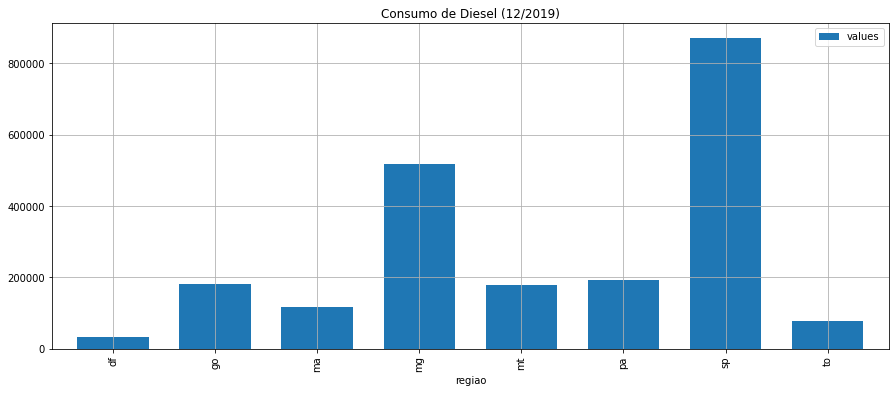

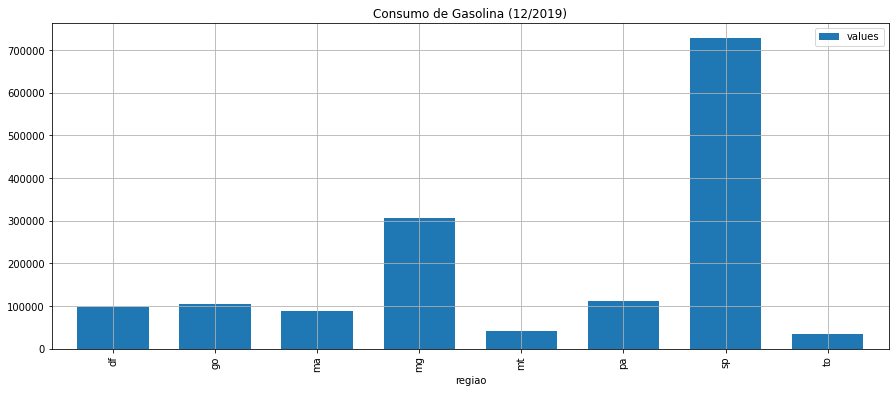

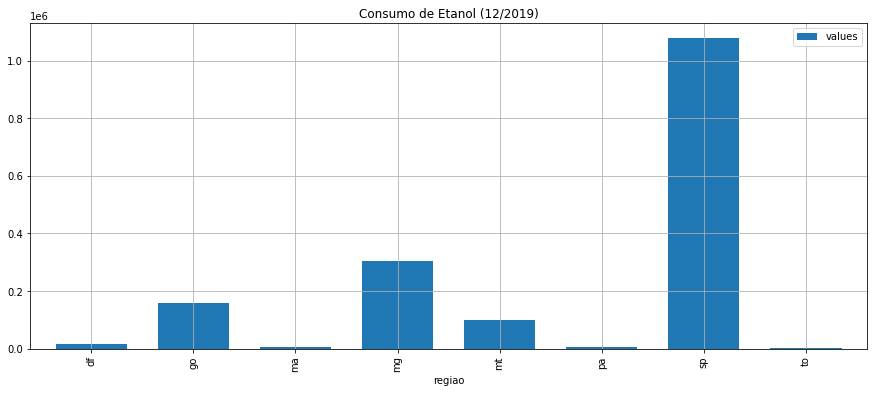

In [153]:
nova_base_dist.plot.bar(x='regiao', y='values',width=0.7, grid=True, figsize=(15, 6), title='Consumo de Diesel (12/2019)')
nova_base_gasolina_dist.plot.bar(x='regiao', y='values',width=0.7, grid=True, figsize=(15, 6), title='Consumo de Gasolina (12/2019)')
nova_base_etanol_dist.plot.bar(x='regiao', y='values',width=0.7, grid=True, figsize=(15, 6), title='Consumo de Etanol (12/2019)')

## Gráfico 2: PIB por estado

In [155]:
pib_estado = pd.read_csv("/content/drive/MyDrive/pib_estado_ibge.csv", sep=';')
pib_estado

uf       valor
0  df   273613711
1  go   208672492
2  ma    97339938
3  mg   651872684
4  mt   142122028
5  pa   466377036
6  sp  2348338000
7  to    39355941

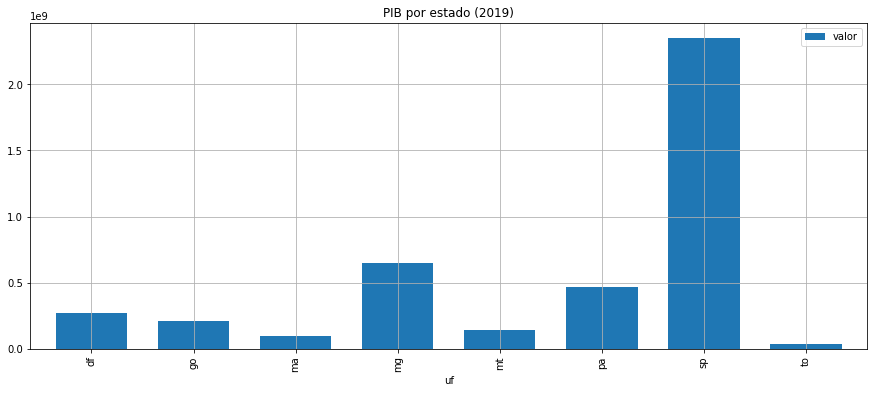

In [156]:
pib_estado.plot.bar(x='uf', y='valor',width=0.7, grid=True, figsize=(15, 6), title='PIB por estado (2019)')

## Gráfico 3: População ocupada por estado

In [162]:
pop_ocupada = pd.read_excel("/content/drive/MyDrive/populacao_ocupada.xlsx", sheet_name='resumo')
pop_ocupada

uf  População ocupada (mil pessoas)
0  df                      1438.807116
1  go                      3399.534143
2  ma                      2277.558106
3  mg                     10219.251353
4  mt                      1697.758245
5  pa                      5623.242994
6  sp                     22820.584146
7  to                       652.689293

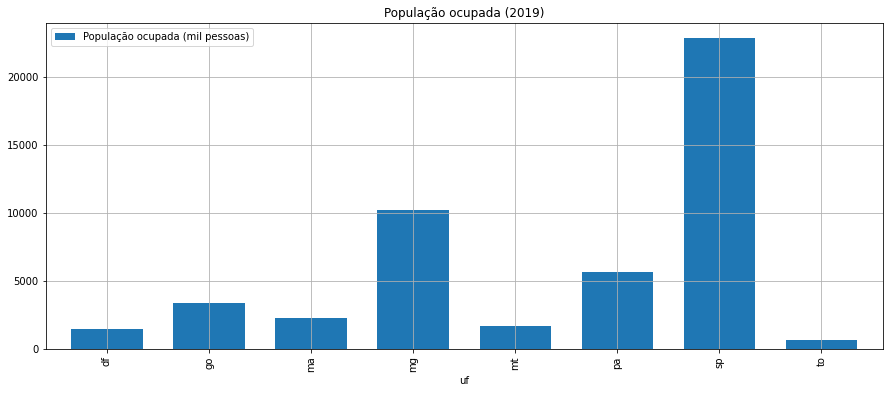

In [163]:
pop_ocupada.plot.bar(x='uf', y='População ocupada (mil pessoas)',width=0.7, grid=True, figsize=(15, 6), title='População ocupada (2019)')

## Gráfico 4: Frota por estado

In [164]:
frota_estado = pd.read_excel("/content/drive/MyDrive/frota_estado.xlsx", sheet_name='resumo')
frota_estado

UF     Total
0  df   1934210
1  go   4203370
2  ma   1855570
3  mg  12053218
4  mt   2322156
5  pa   2229234
6  sp  30778960
7  to    754206

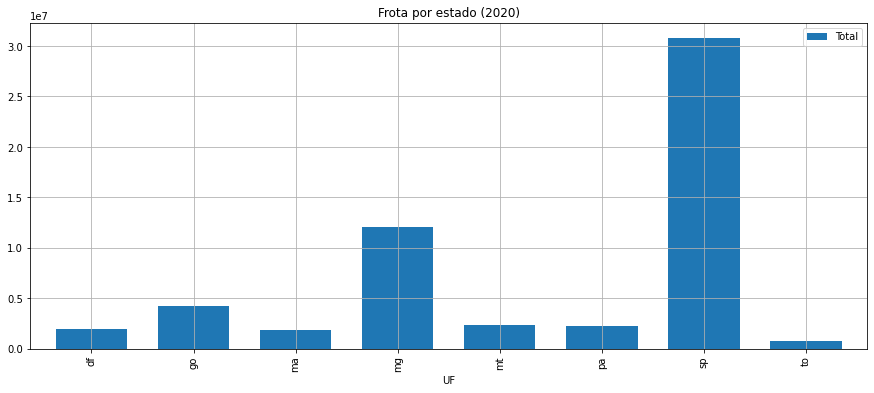

In [165]:
frota_estado.plot.bar(x='UF', y='Total',width=0.7, grid=True, figsize=(15, 6), title='Frota por estado (2020)')

## Gráfico 5: Consumo de gasolina e etanol

In [137]:
base_gas_e_et = base_gasolina_br
base_gas_e_et = base_gas_e_et.rename(columns={'br': 'gasolina'})
base_gas_e_et['etanol'] = base_etanol_br['br']
base_gas_e_et

regiao         gasolina       etanol
date                                
2000-01-01  1810572.096   425187.481
2000-02-01  1966364.759   421706.408
2000-03-01  1801197.989   405266.215
2000-04-01  1863561.899   414609.690
2000-05-01  1869175.737   435214.558
...                 ...          ...
2020-08-01  2933072.544  1569803.325
2020-09-01  3127219.046  1700749.710
2020-10-01  3390764.563  1871664.946
2020-11-01  3217673.158  1704279.537
2020-12-01  3716766.189  1936374.559

[252 rows x 2 columns]

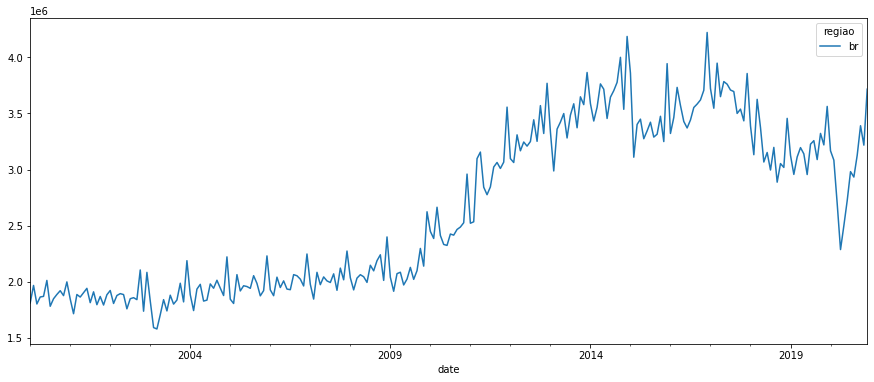

In [166]:
base_gasolina_br.plot(figsize=(15,6))

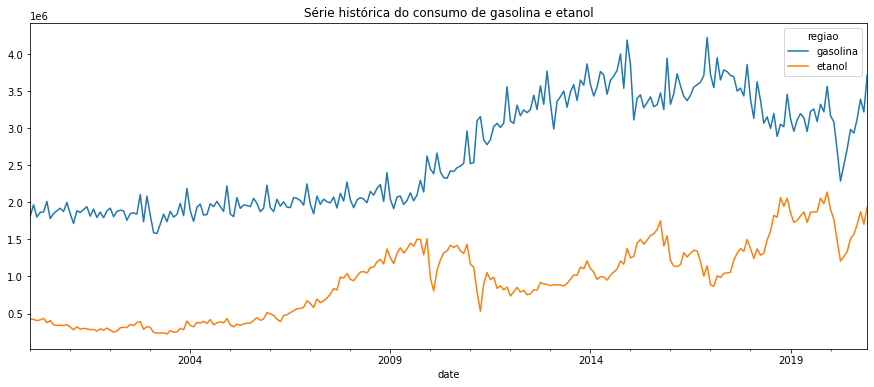

In [167]:
base_gas_e_et.plot(figsize=(15,6), title='Série histórica do consumo de gasolina e etanol')

## Gráfico 6: Sazonalidade entre gasolina e etanol

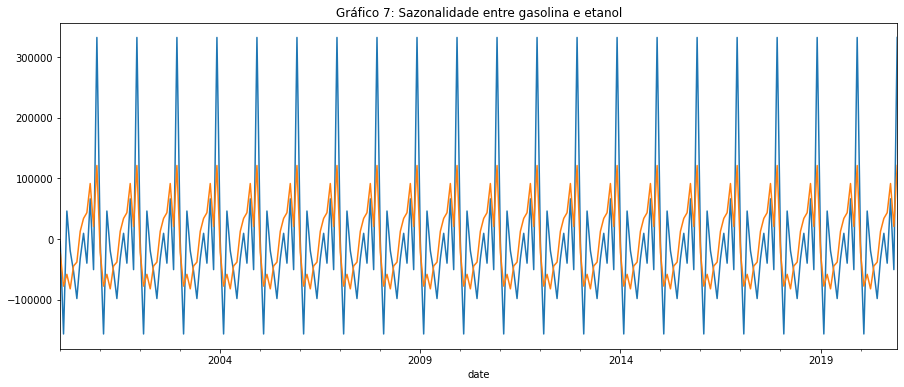

In [168]:
plt.title("Gráfico 7: Sazonalidade entre gasolina e etanol")
br_gasolina_saz.plot(figsize=(15,6))
br_etanol_saz.plot(figsize=(15,6))